In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
data = pd.read_csv('train.csv')   # Read the CSV file into a Pandas Dataframe
data.head()   # Peak into the first 5 rows of the dataset

number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  \
0                   4         88.944468             57.862692   
1                   5         92.729214             58.518416   
2                   4         88.944468             57.885242   
3                   4         88.944468             57.873967   
4                   4         88.944468             57.840143   

   gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  \
0          66.361592              36.116612             1.181795   
1          73.132787              36.396602             1.449309   
2          66.361592              36.122509             1.181795   
3          66.361592              36.119560             1.181795   
4          66.361592              36.110716             1.181795   

   wtd_entropy_atomic_mass  range_atomic_mass  wtd_range_atomic_mass  \
0                 1.062396          122.90607              31.794921   
1                 1.057755          122.90607              36.161939   
2                 0.975980          122.90607              35.741099   
3                 1.022291          122.90607              33.768010   
4                 1.129224          122.90607              27.848743   

   std_atomic_mass  ...  wtd_mean_Valence  gmean_Valence  wtd_gmean_Valence  \
0        51.968828  ...          2.257143       2.213364           2.219783   
1        47.094633  ...          2.257143       1.888175           2.210679   
2        51.968828  ...          2.271429       2.213364           2.232679   
3        51.968828  ...          2.264286       2.213364           2.226222   
4        51.968828  ...          2.242857       2.213364           2.206963   

   entropy_Valence  wtd_entropy_Valence  range_Valence  wtd_range_Valence  \
0         1.368922             1.066221              1           1.085714   
1         1.557113             1.047221              2           1.128571   
2         1.368922             1.029175              1           1.114286   
3         1.368922             1.048834              1           1.100000   
4         1.368922             1.096052              1           1.057143   

   std_Valence  wtd_std_Valence  critical_temp  
0     0.433013         0.437059           29.0  
1     0.632456         0.468606           26.0  
2     0.433013         0.444697           19.0  
3     0.433013         0.440952           22.0  
4     0.433013         0.428809           23.0  

[5 rows x 82 columns]

In [ ]:
data.shape    # Shape (rows, columns) of the dataset

(21263, 82)

In [ ]:
data.info()   # Information about the columns of the dataset - name, datatype, count of non-null values

In [30]:
# Does this dataset have any missing values?

if(data.isnull().values.any() == True):
  print("This dataset has some missing values which need to be handled")
  data = data.dropna()  # Rows with missing values (if any) are dropped

else:
  print("This dataset has no missing values. No action required.")

This dataset has no missing values. No action required.


In [31]:
# Does this dataset have any duplicate rows?

if(data.duplicated().values.any() == True):
  ndup = data[data.duplicated()].shape[0]
  print(f"This dataset has {ndup} duplicated rows")
  data = data.drop_duplicates()  # Rows with duplicate values (if any) are dropped
  print("\nThe duplicate rows have been dropped from the dataset now")

else:
  print("This dataset has no duplicated rows. No action required")



This dataset has 66 duplicated rows

The duplicate rows have been dropped from the dataset now


In [ ]:
# Dataset shape after handling missing values and duplicates
data.shape

(21197, 82)

In [ ]:
data.describe()     # Gives a descriptive statistical summary of the data columns

number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  \
count        21197.000000      21197.000000          21197.000000   
mean             4.120300         87.544201             72.945331   
std              1.438282         29.643136             33.460789   
min              1.000000          6.941000              6.423452   
25%              3.000000         72.522475             52.143839   
50%              4.000000         84.922750             60.689236   
75%              5.000000        100.374260             85.982703   
max              9.000000        208.980400            208.980400   

       gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  \
count       21197.000000           21197.000000         21197.000000   
mean           71.253164              58.474874             1.166782   
std            30.990774              36.615381             0.364712   
min             5.320573               1.960849             0.000000   
25%            58.041225              35.247208             0.972995   
50%            66.361592              39.873869             1.199541   
75%            78.019689              73.056021             1.444537   
max           208.980400             208.980400             1.983797   

       wtd_entropy_atomic_mass  range_atomic_mass  wtd_range_atomic_mass  \
count             21197.000000       21197.000000           21197.000000   
mean                  1.065103         115.751945              33.204053   
std                   0.401225          54.584784              26.966285   
min                   0.000000           0.000000               0.000000   
25%                   0.781227          78.899680              16.799962   
50%                   1.148465         122.906070              26.601500   
75%                   1.360388         154.119320              38.336200   
max                   1.958203         207.972460             205.589910   

       std_atomic_mass  ...  wtd_mean_Valence  gmean_Valence  \
count     21197.000000  ...      21197.000000   21197.000000   
mean         44.436401  ...          3.148856       3.052542   
std          20.019732  ...          1.189878       1.044637   
min           0.000000  ...          1.000000       1.000000   
25%          32.890369  ...          2.116279       2.267933   
50%          45.123500  ...          2.605455       2.615321   
75%          59.356406  ...          4.007317       3.662842   
max         101.019700  ...          7.000000       7.000000   

       wtd_gmean_Valence  entropy_Valence  wtd_entropy_Valence  range_Valence  \
count       21197.000000     21197.000000         21197.000000   21197.000000   
mean            3.051485         1.297020             1.053977       2.042553   
std             1.173221         0.392834             0.380121       1.243242   
min             1.000000         0.000000             0.000000       0.000000   
25%             2.090896         1.060857             0.778998       1.000000   
50%             2.428047         1.368922             1.169665       2.000000   
75%             3.909523         1.589027             1.331531       3.000000   
max             7.000000         2.141963             1.949739       6.000000   

       wtd_range_Valence   std_Valence  wtd_std_Valence  critical_temp  
count       21197.000000  21197.000000     21197.000000   21197.000000  
mean            1.480890      0.839692         0.674168      34.494532  
std             0.977545      0.485002         0.456038      34.276465  
min             0.000000      0.000000         0.000000       0.000210  
25%             0.921250      0.451754         0.306892       5.380000  
50%             1.062857      0.800000         0.500000      20.000000  
75%             1.910400      1.200000         1.021023      63.000000  
max             6.992200      3.000000         3.000000     185.000000  

[8 rows x 82 columns]

(array([3., 1., 2., 0., 0., 4., 1., 7., 2., 4., 1., 1., 4., 0., 3., 3., 0.,
        1., 0., 0., 0., 4., 1., 0., 2., 1., 3., 2., 1., 4., 3., 1., 2., 1.,
        2., 6., 6., 2., 1., 2.]),
 array([-0.63192366, -0.59810156, -0.56427946, -0.53045736, -0.49663526,
        -0.46281316, -0.42899106, -0.39516896, -0.36134686, -0.32752476,
        -0.29370266, -0.25988057, -0.22605847, -0.19223637, -0.15841427,
        -0.12459217, -0.09077007, -0.05694797, -0.02312587,  0.01069623,
         0.04451833,  0.07834043,  0.11216253,  0.14598463,  0.17980672,
         0.21362882,  0.24745092,  0.28127302,  0.31509512,  0.34891722,
         0.38273932,  0.41656142,  0.45038352,  0.48420562,  0.51802772,
         0.55184982,  0.58567192,  0.61949401,  0.65331611,  0.68713821,
         0.72096031]),
 <BarContainer object of 40 artists>)

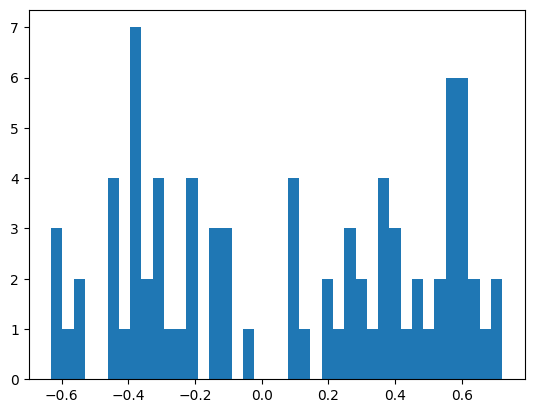

In [32]:
# Histogram for critical_temp

correlation = data.corr()
correlation = correlation.drop('critical_temp', axis=0)
plt.hist(correlation['critical_temp'], bins=40)

In [ ]:
for k, v in correlation['critical_temp'].items():
    v = abs(v)
    print(v)

0.600394055182847
0.11317839649303417
0.3119832502072971
0.22994106405006937
0.3694840714111939
0.5428941726044171
0.6265356613492065
0.4916424215328923
0.3372375169225366
0.378519448391443
0.35892821196282804
0.10140062987501358
0.3978883959339062
0.025680476288429257
0.3428140319387177
0.5671556479141354
0.3877026432771749
0.6001786440355417
0.29963177976562727
0.5410910690832423
0.5814422035843121
0.10610167692790742
0.29606092702537734
0.14266782717596035
0.4042285854629204
0.5582491219463678
0.6029857425181072
0.6533940754080718
0.3436932854617031
0.5591324616314539
0.5989715195377009
0.3677433259068467
0.43346572642684544
0.5411319269888313
0.5394477615913035
0.4564919111422076
0.4000232128730575
0.26027158350102375
0.28465233164237097
0.11519520597369032
0.20756940955483535
0.19359074875549878
0.11105586326885865
0.3801584285902911
0.1074977942891853
0.43635720404810685
0.2370451595999248
0.2788019928070346
0.18450994483643496
0.2614425503125756
0.3148358464654809
0.384887023746

In [ ]:
correlation['critical_temp']

number_of_elements       0.600394
mean_atomic_mass        -0.113178
wtd_mean_atomic_mass    -0.311983
gmean_atomic_mass       -0.229941
wtd_gmean_atomic_mass   -0.369484
                           ...   
wtd_entropy_Valence      0.589204
range_Valence           -0.144629
wtd_range_Valence       -0.439854
std_Valence             -0.208899
wtd_std_Valence         -0.300666
Name: critical_temp, Length: 81, dtype: float64

In [ ]:
corr_abs = correlation['critical_temp'].abs()

In [ ]:
# Drop every row in corr_abs, where the value of that row is less than or equal to 0.260928 and get the names of the rows dropped

row_names = []

corr_abs = corr_abs[corr_abs < 0.260928]

for k, v in corr_abs.items():
    row_names.append(k)

row_names

['mean_atomic_mass',
 'gmean_atomic_mass',
 'mean_fie',
 'gmean_fie',
 'mean_atomic_radius',
 'gmean_atomic_radius',
 'range_Density',
 'std_Density',
 'wtd_std_Density',
 'mean_ElectronAffinity',
 'wtd_mean_ElectronAffinity',
 'wtd_gmean_ElectronAffinity',
 'wtd_entropy_ElectronAffinity',
 'wtd_range_ElectronAffinity',
 'range_FusionHeat',
 'std_FusionHeat',
 'wtd_std_FusionHeat',
 'entropy_ThermalConductivity',
 'wtd_entropy_ThermalConductivity',
 'range_Valence',
 'std_Valence']

In [ ]:
# correlation = correlation['critical_temp'].abs() > 0.26

correlation = correlation[correlation['critical_temp'].abs() > 0.26]
correlation.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61 entries, number_of_elements to wtd_std_Valence
Data columns (total 82 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   number_of_elements               61 non-null     float64
 1   mean_atomic_mass                 61 non-null     float64
 2   wtd_mean_atomic_mass             61 non-null     float64
 3   gmean_atomic_mass                61 non-null     float64
 4   wtd_gmean_atomic_mass            61 non-null     float64
 5   entropy_atomic_mass              61 non-null     float64
 6   wtd_entropy_atomic_mass          61 non-null     float64
 7   range_atomic_mass                61 non-null     float64
 8   wtd_range_atomic_mass            61 non-null     float64
 9   std_atomic_mass                  61 non-null     float64
 10  wtd_std_atomic_mass              61 non-null     float64
 11  mean_fie                         61 non-null     float64
 12 

In [ ]:
for col_name in row_names:
    data = data.drop(col_name, axis=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21197 entries, 0 to 21262
Data columns (total 61 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   number_of_elements             21197 non-null  int64  
 1   wtd_mean_atomic_mass           21197 non-null  float64
 2   wtd_gmean_atomic_mass          21197 non-null  float64
 3   entropy_atomic_mass            21197 non-null  float64
 4   wtd_entropy_atomic_mass        21197 non-null  float64
 5   range_atomic_mass              21197 non-null  float64
 6   wtd_range_atomic_mass          21197 non-null  float64
 7   std_atomic_mass                21197 non-null  float64
 8   wtd_std_atomic_mass            21197 non-null  float64
 9   wtd_mean_fie                   21197 non-null  float64
 10  wtd_gmean_fie                  21197 non-null  float64
 11  entropy_fie                    21197 non-null  float64
 12  wtd_entropy_fie                21197 non-null 

In [ ]:
correlation = data.corr()

# Plot a large sized correlation heatmap using sns.heatmap

# plt.figure(figsize=(20, 20))

<ipython-input-26-d23e672e3d96>:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 10))


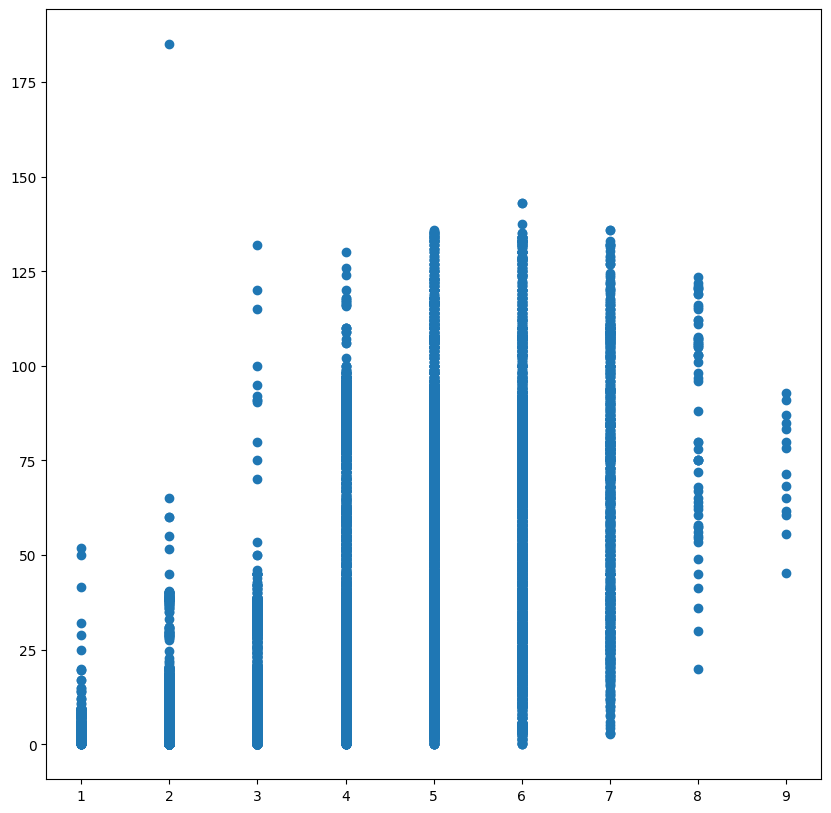

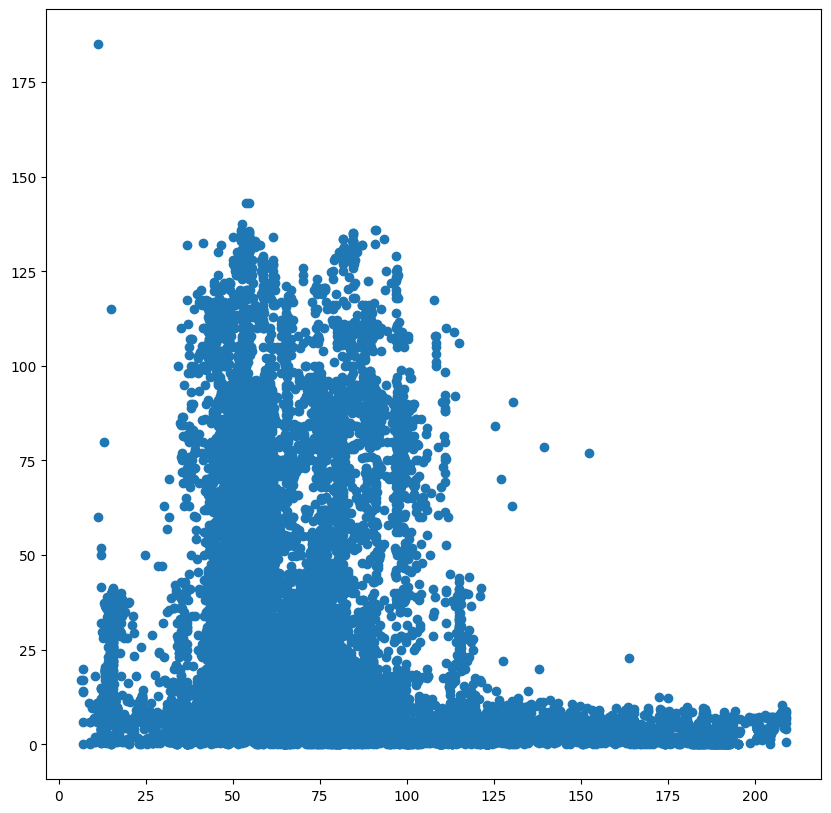

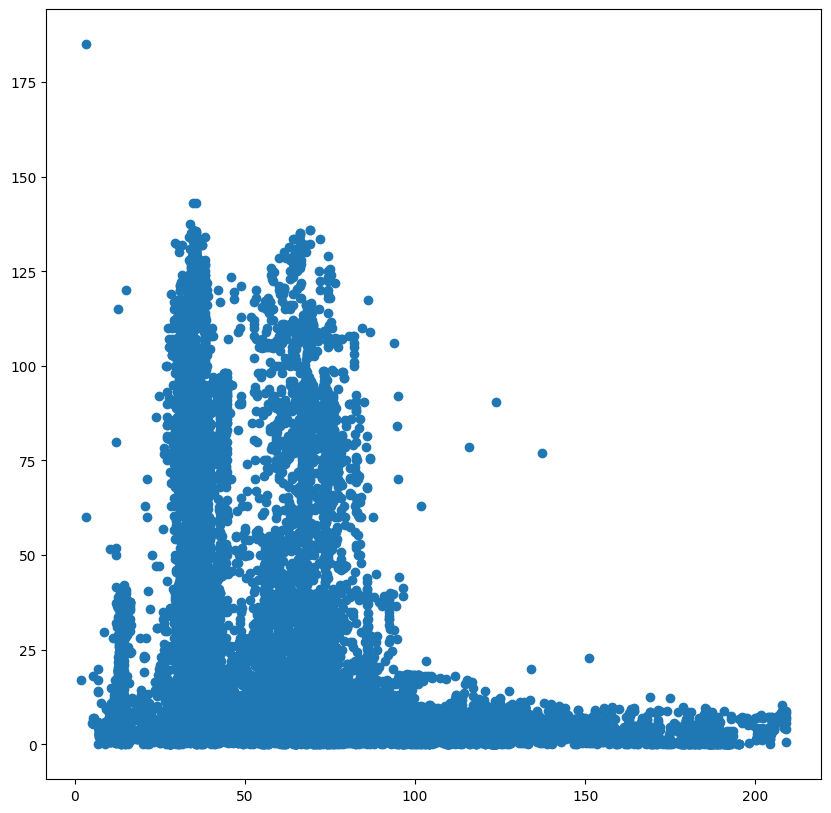

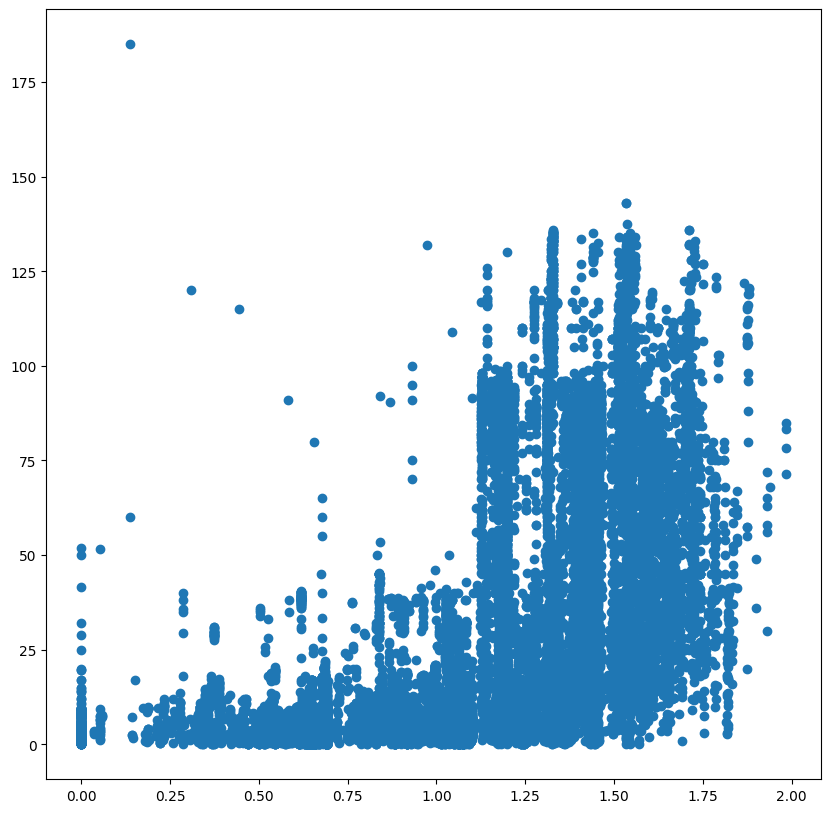

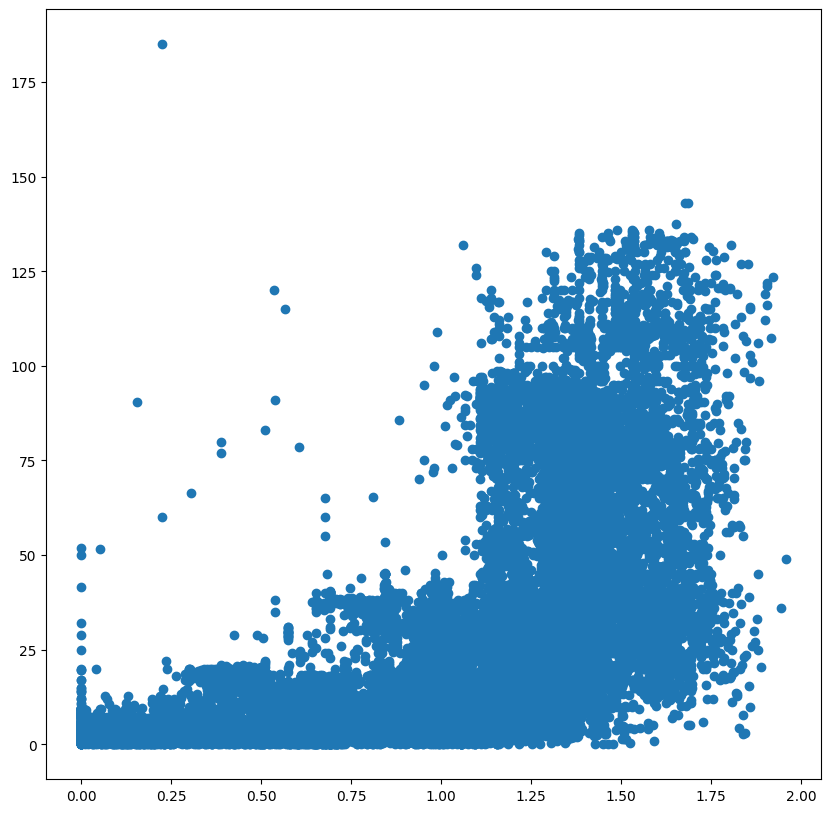

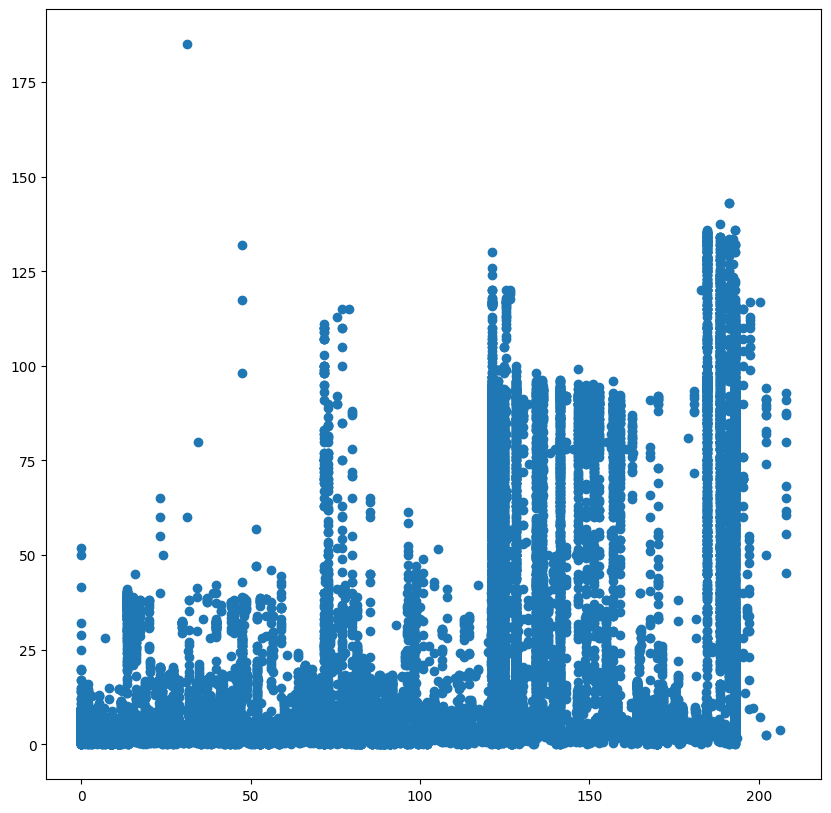

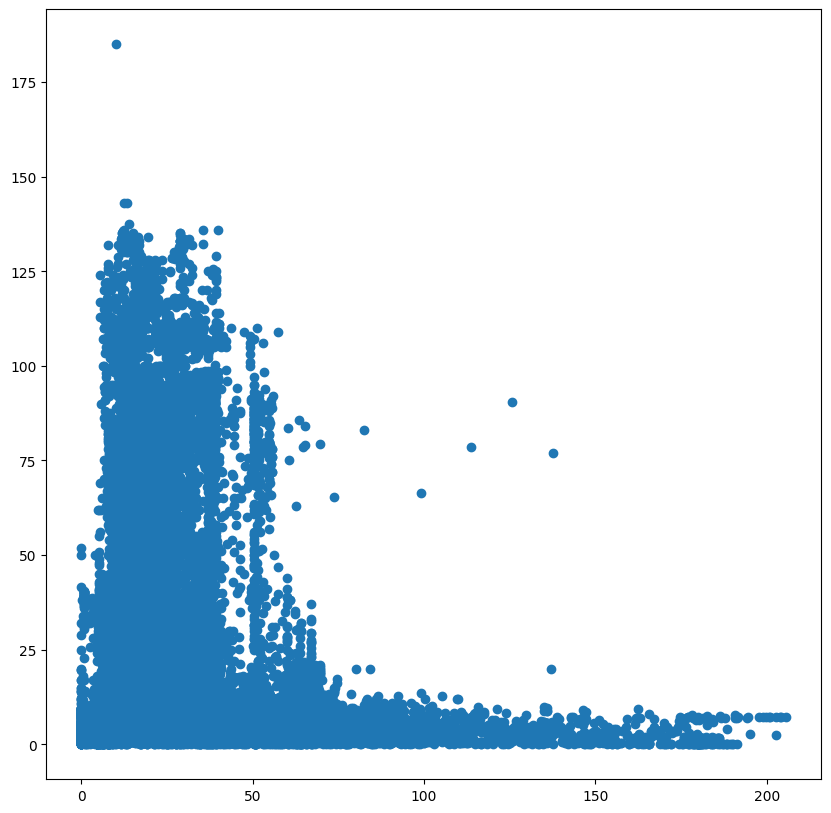

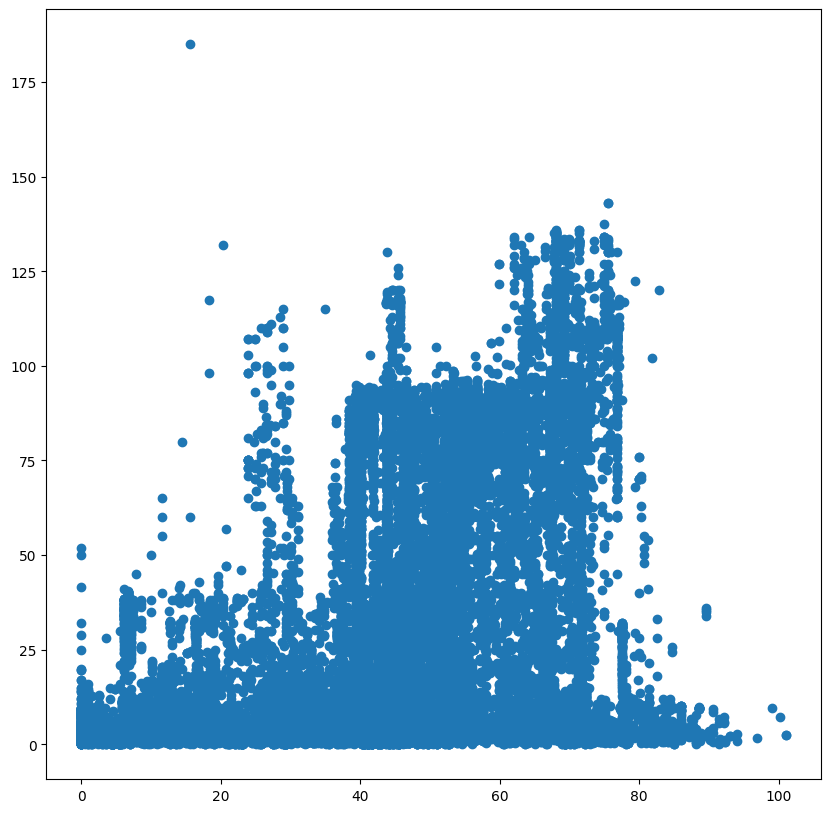

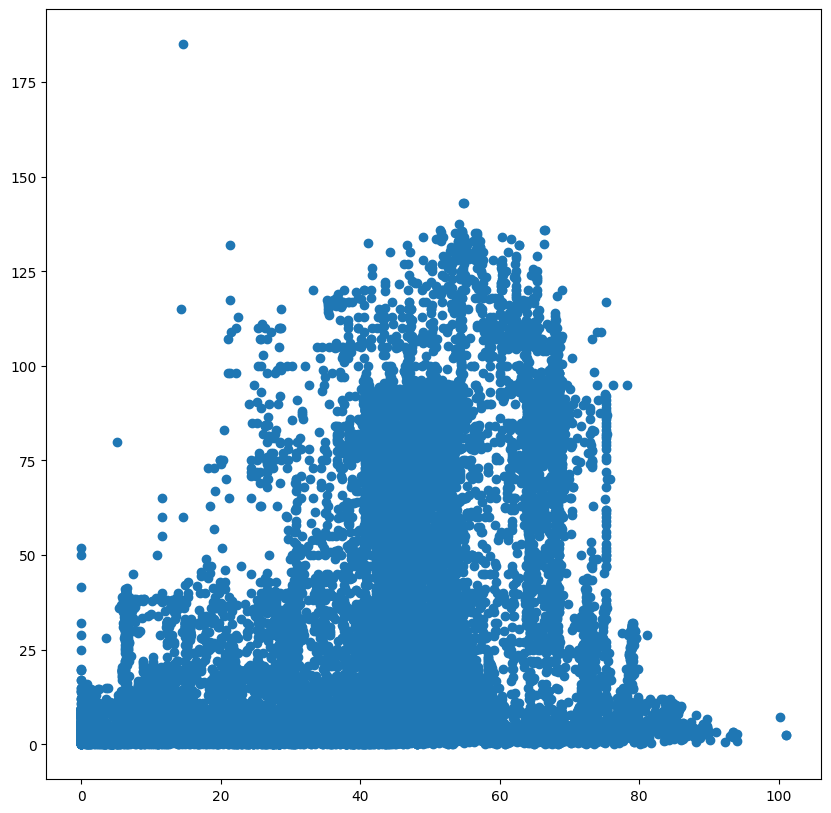

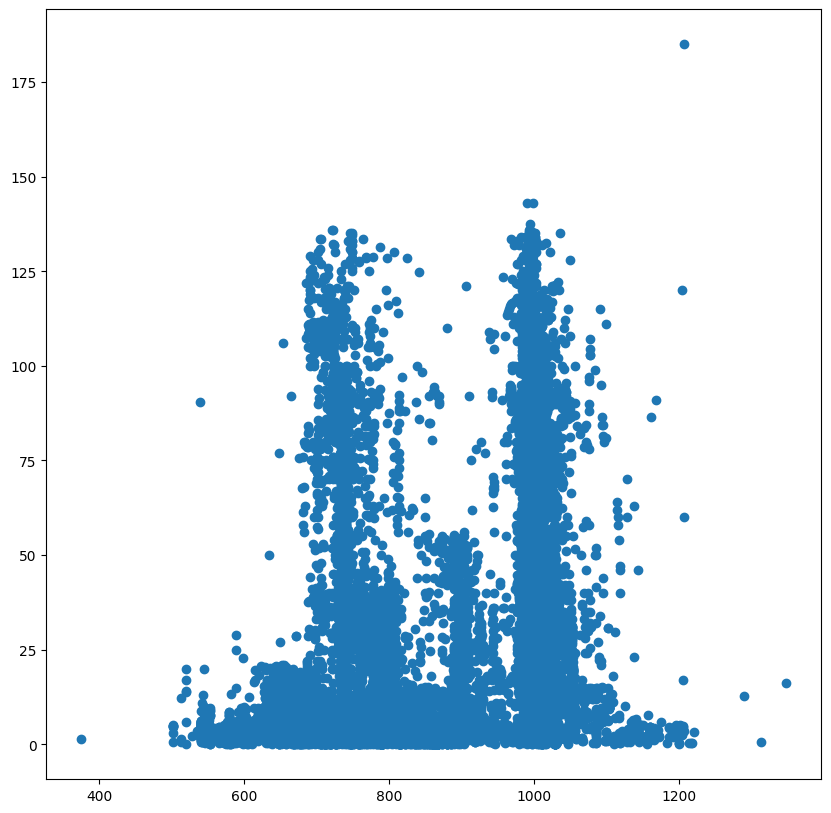

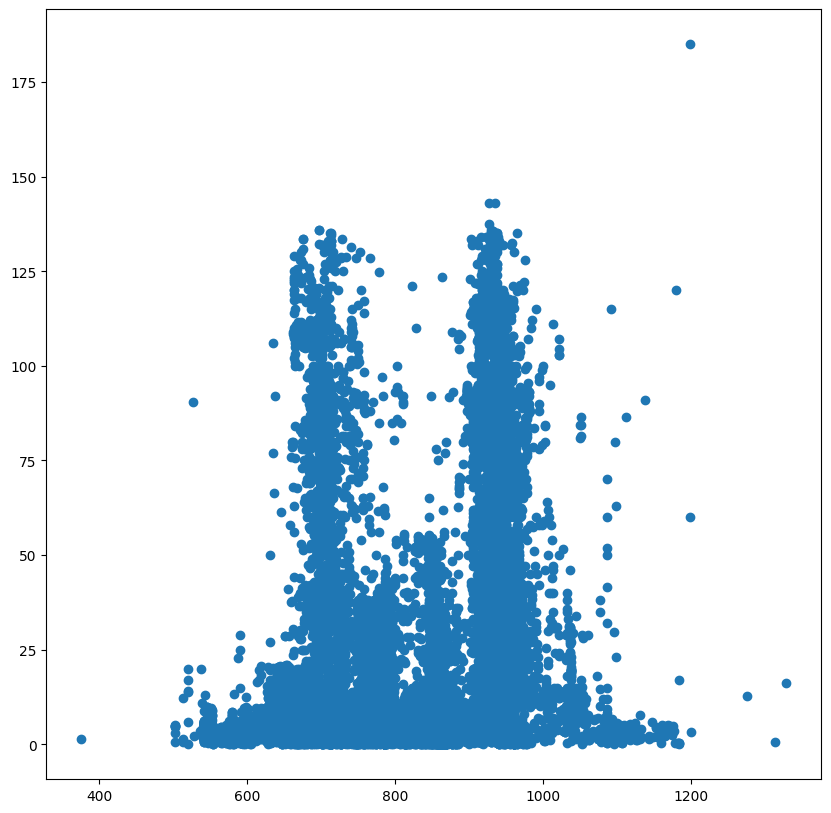

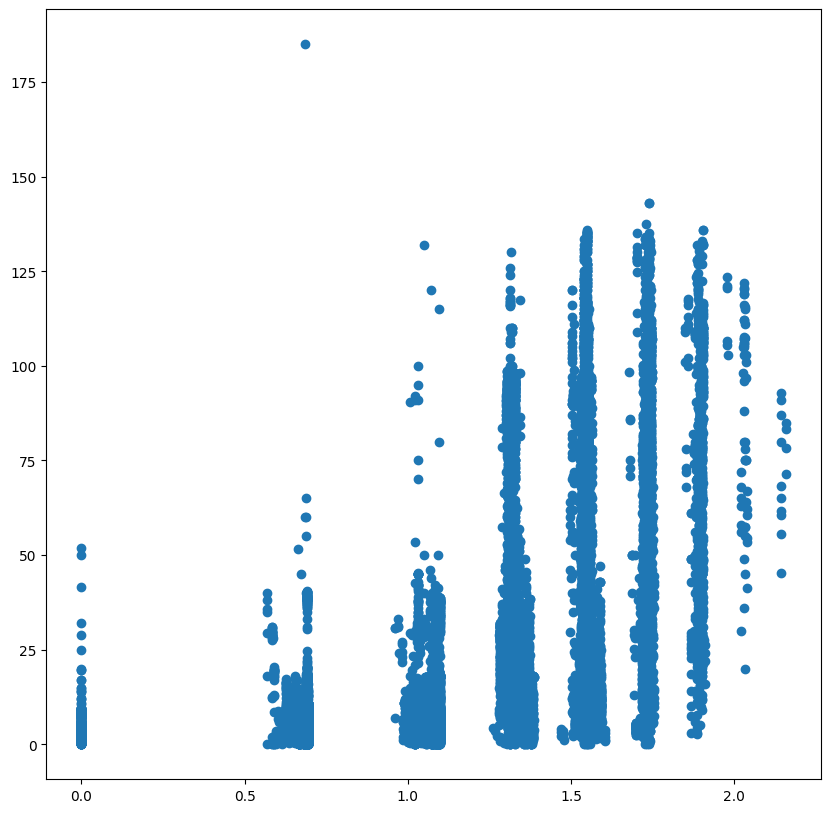

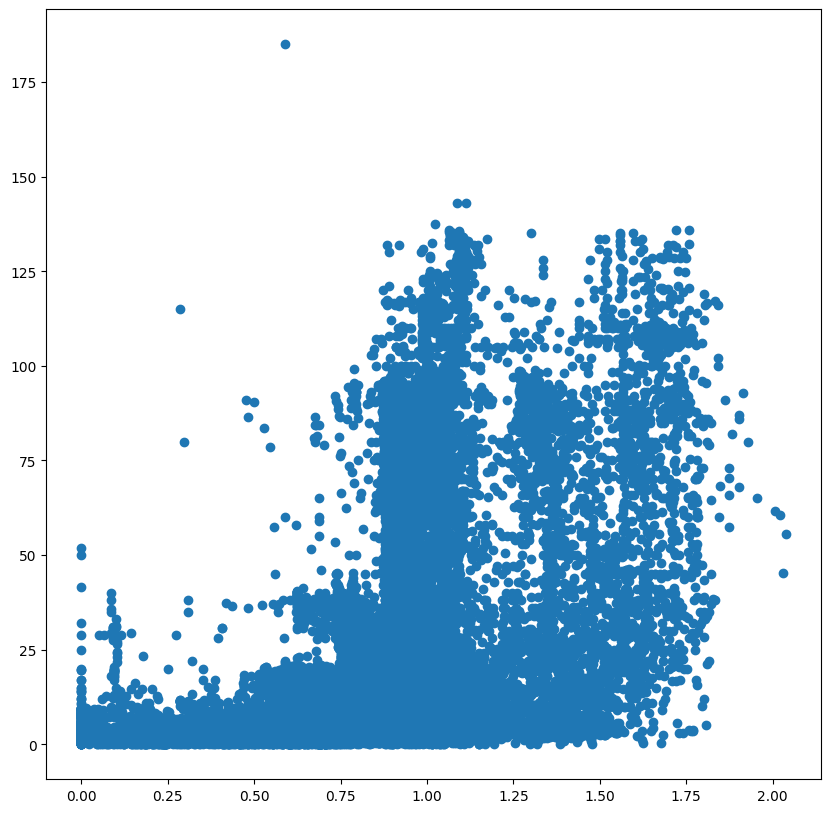

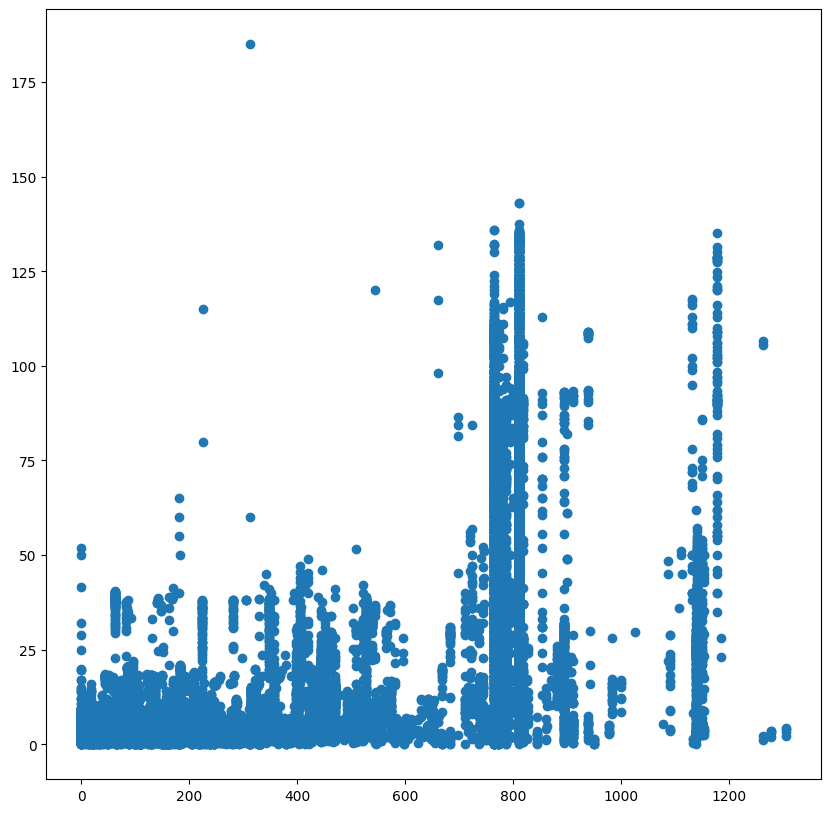

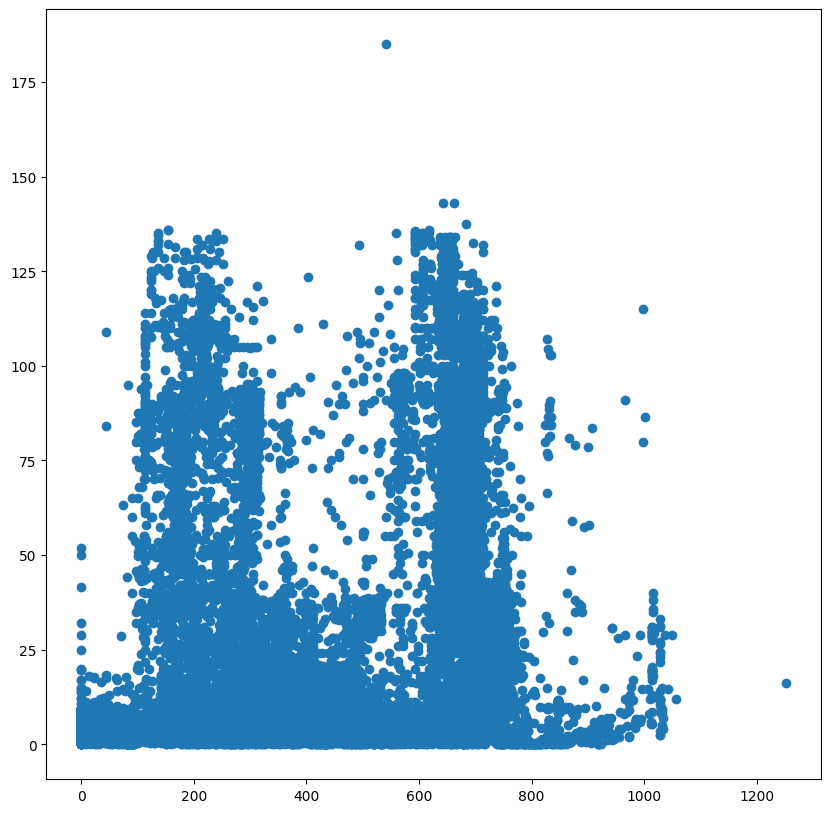

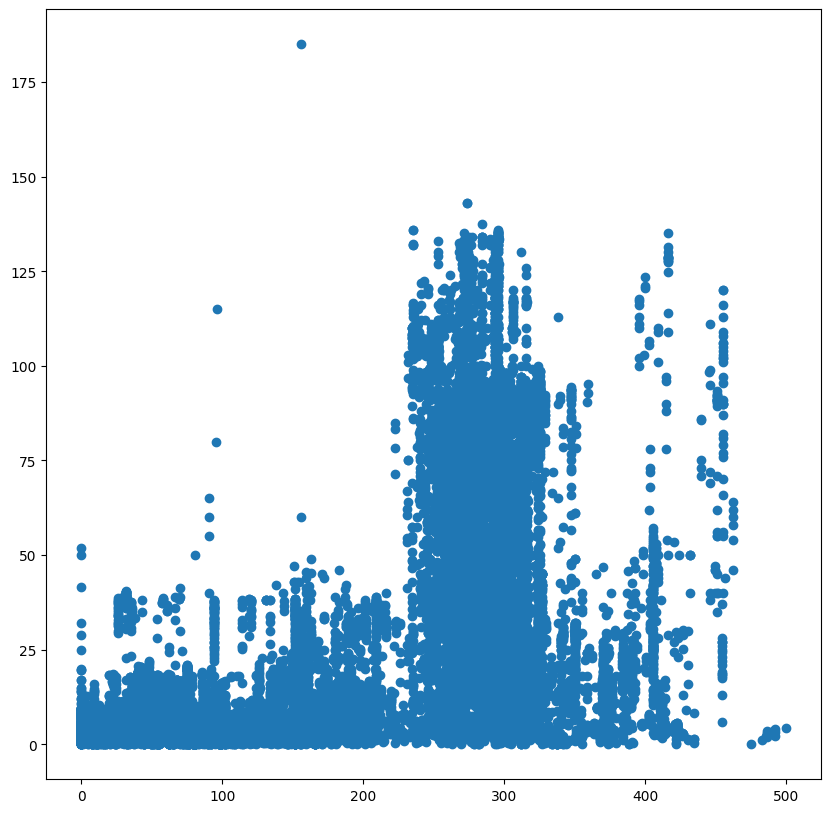

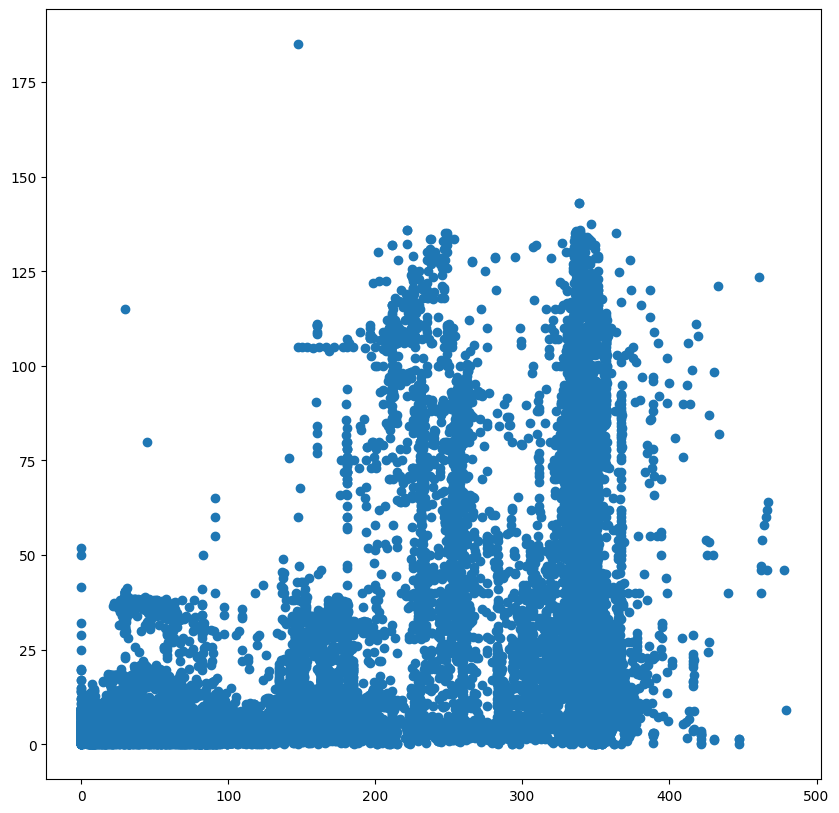

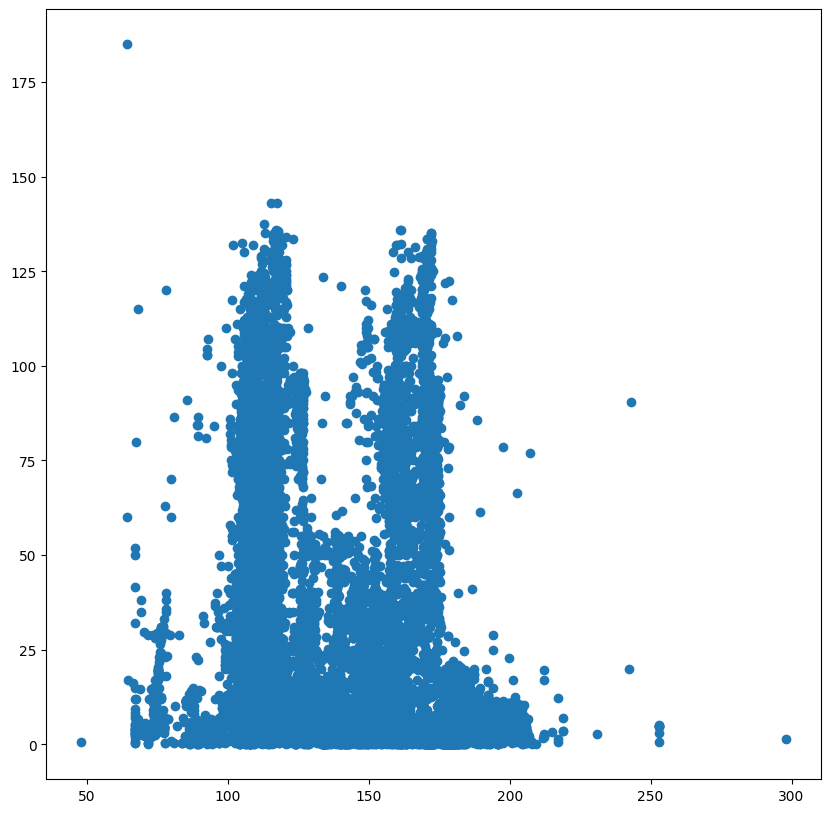

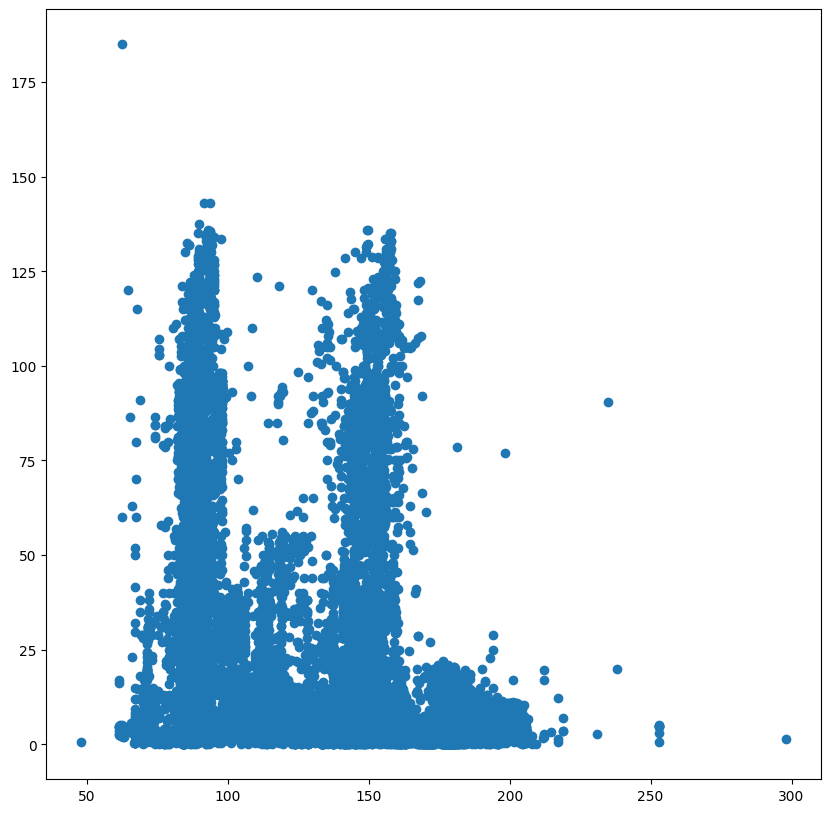

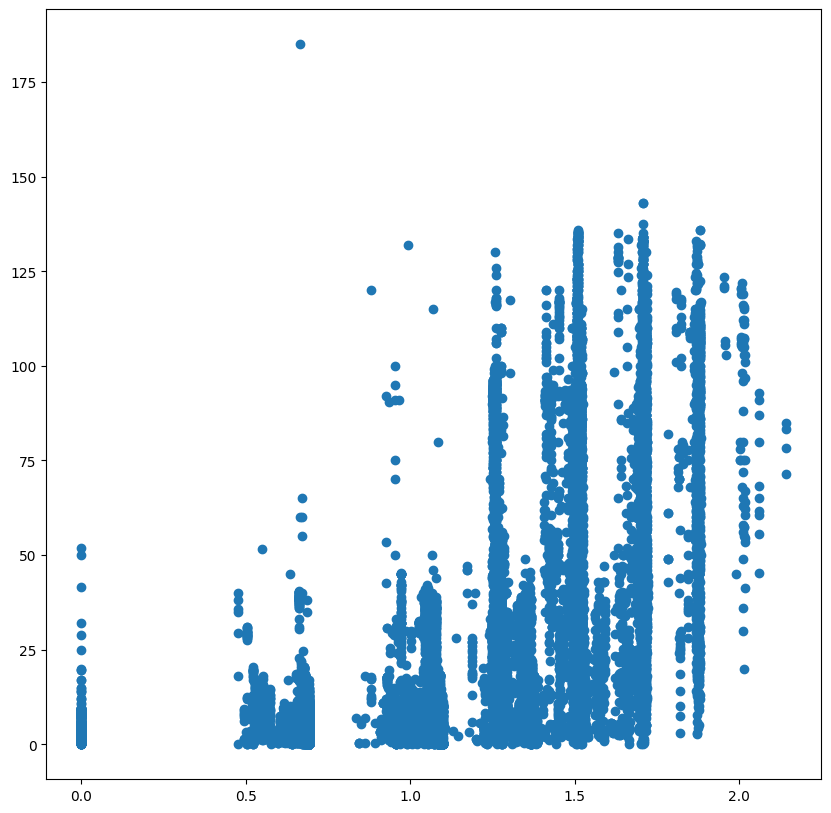

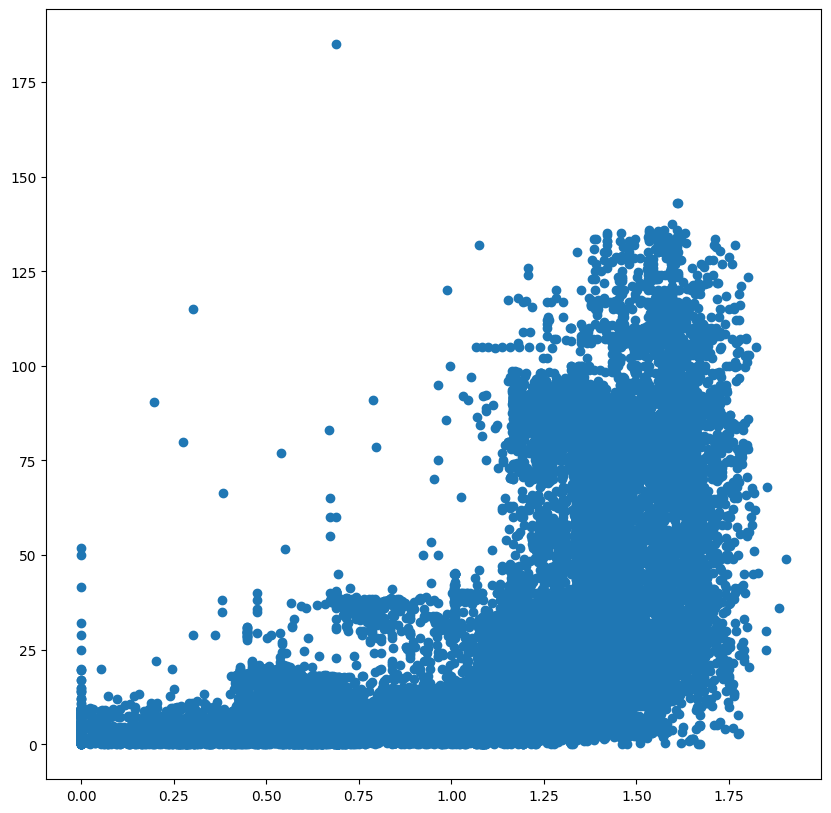

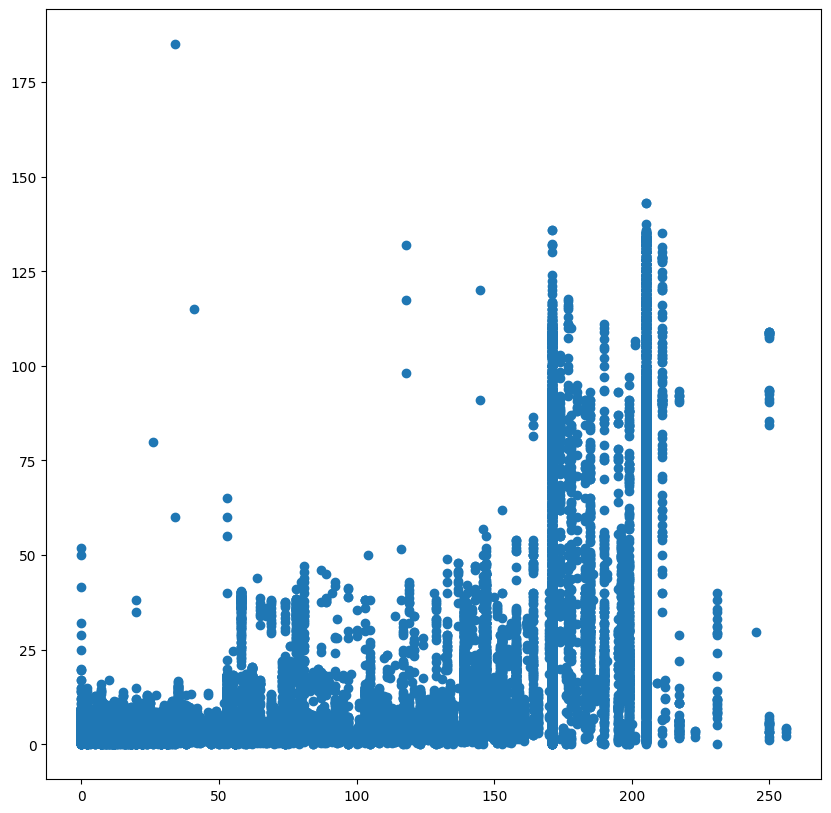

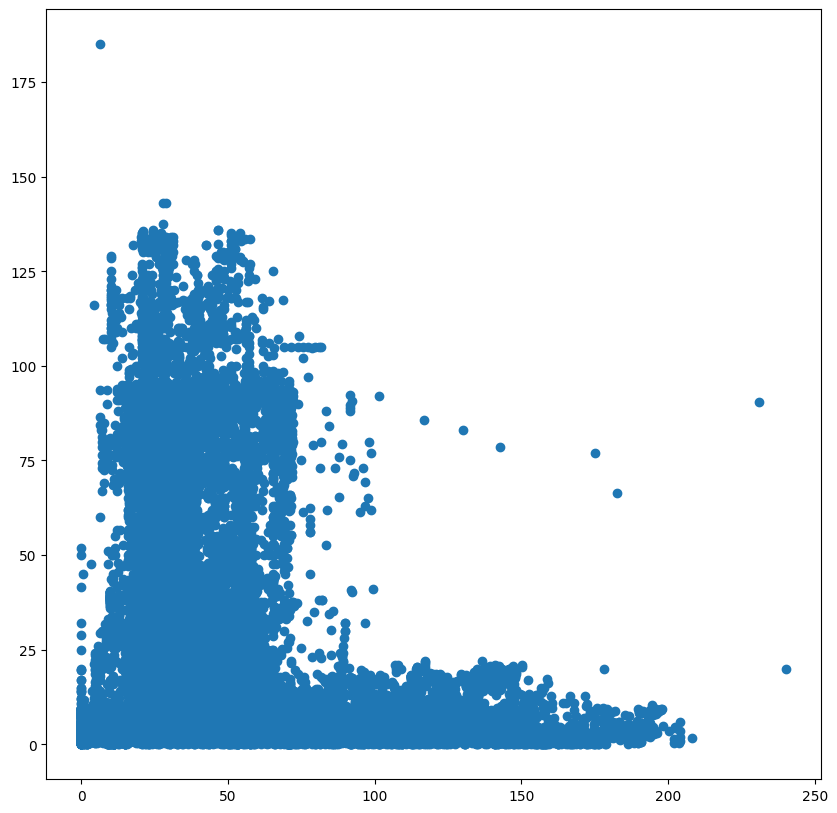

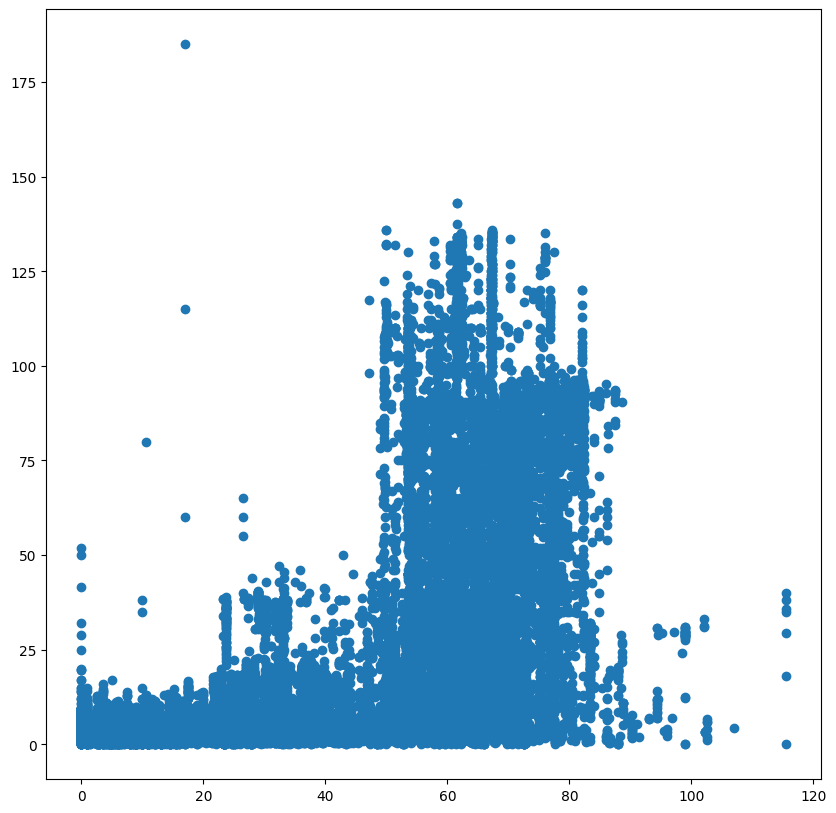

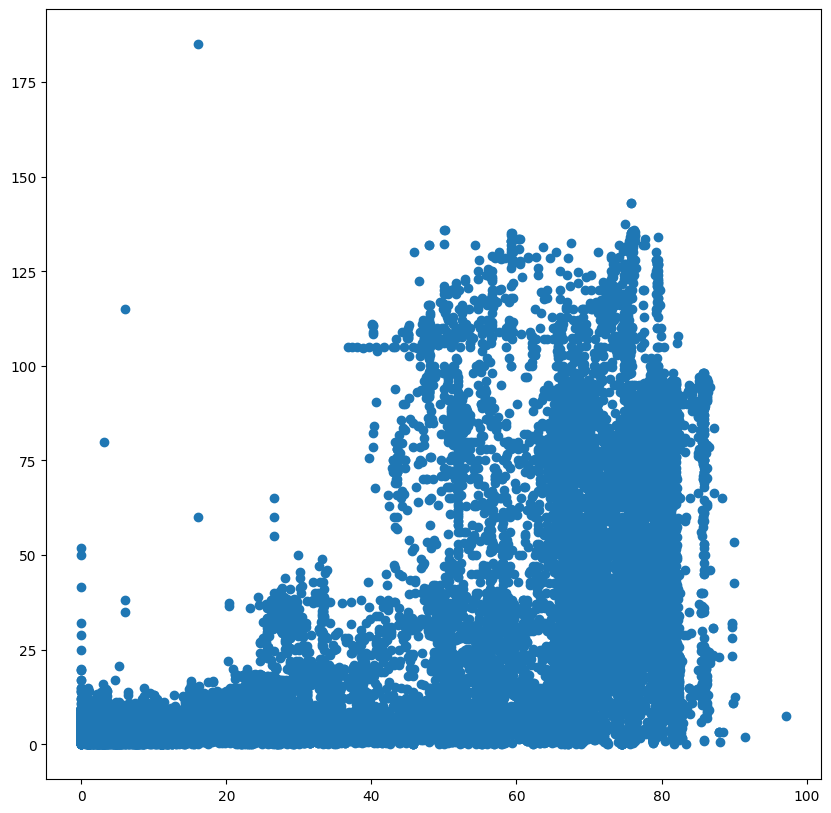

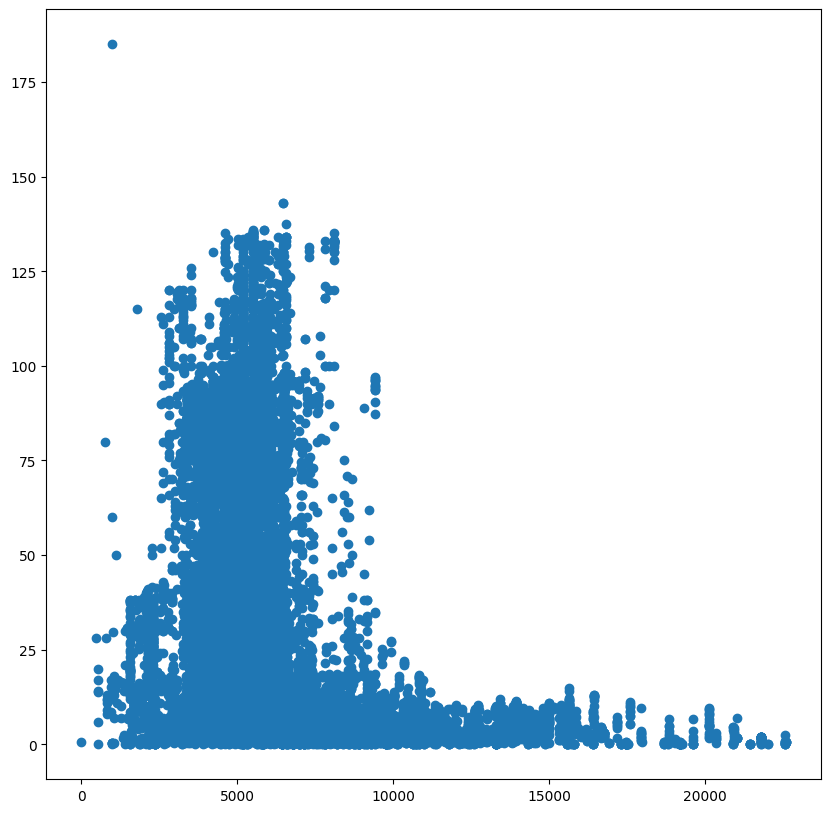

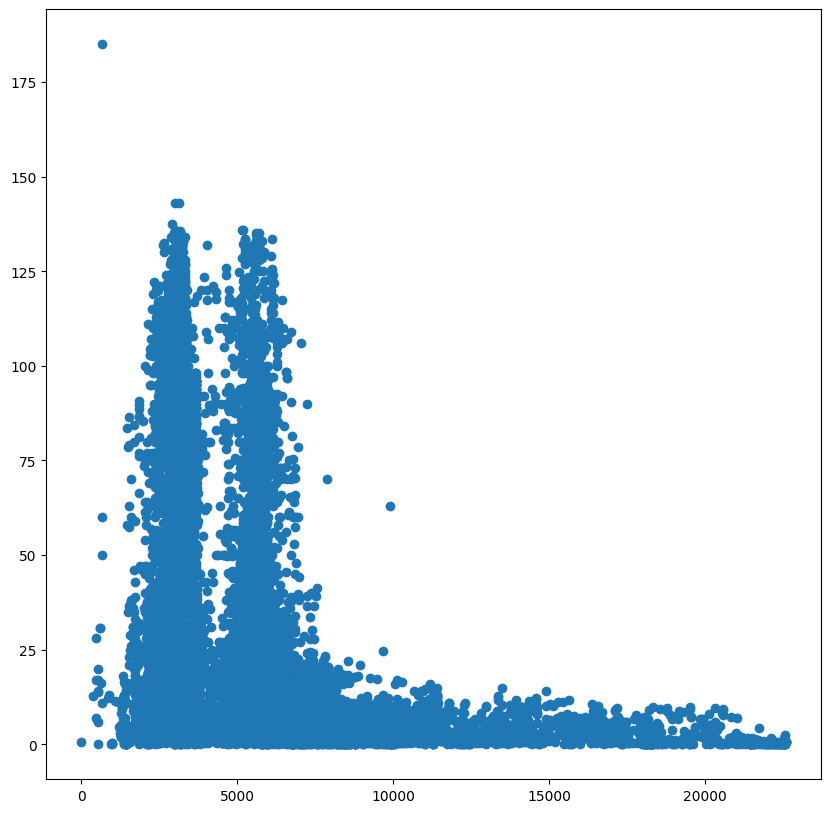

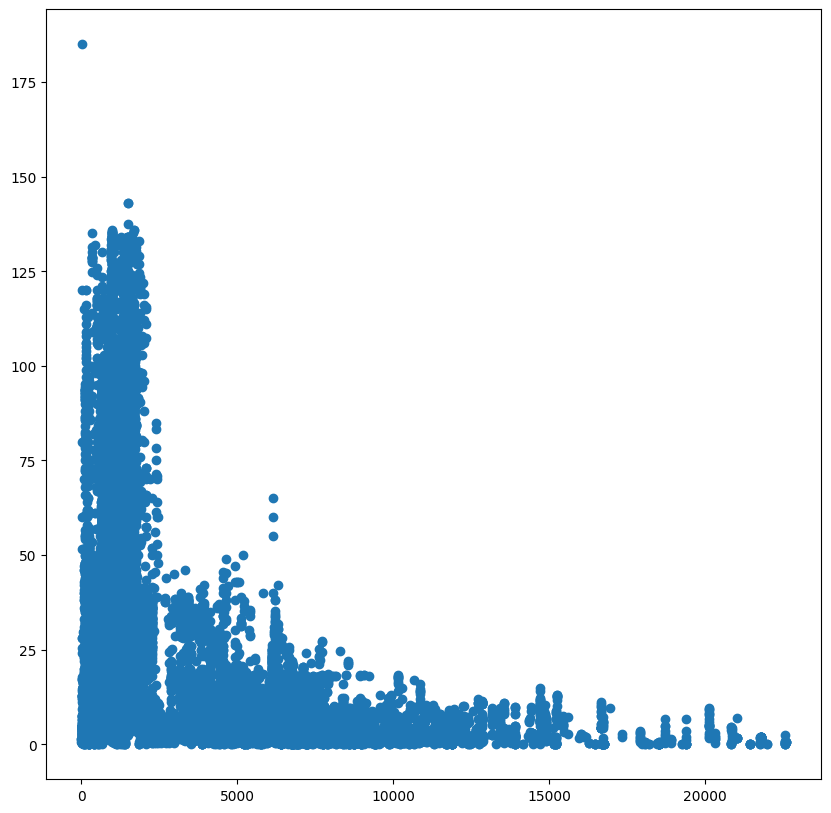

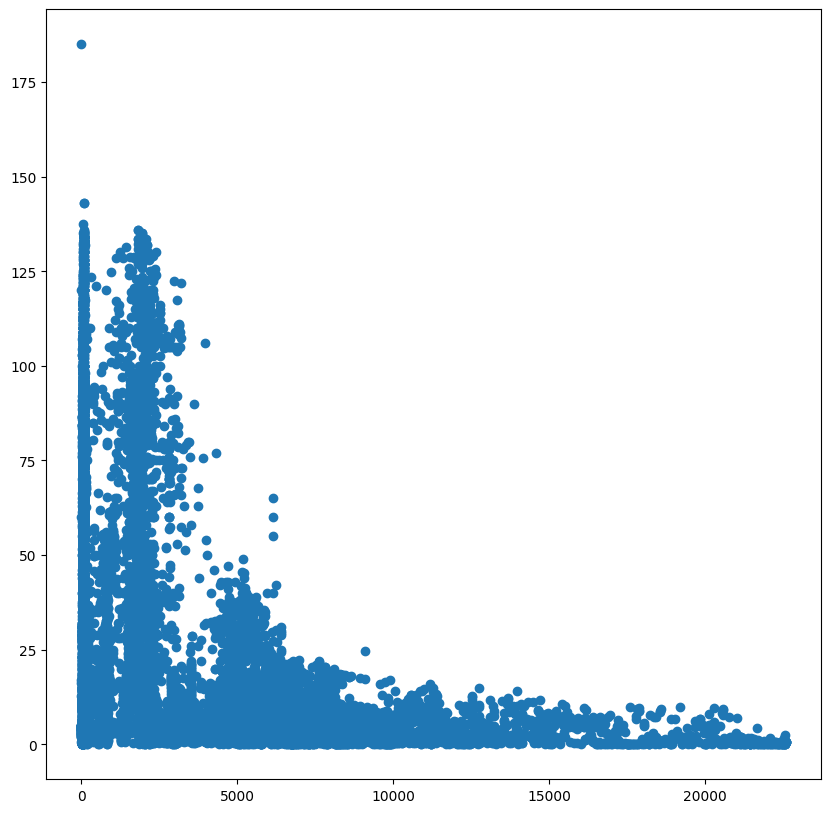

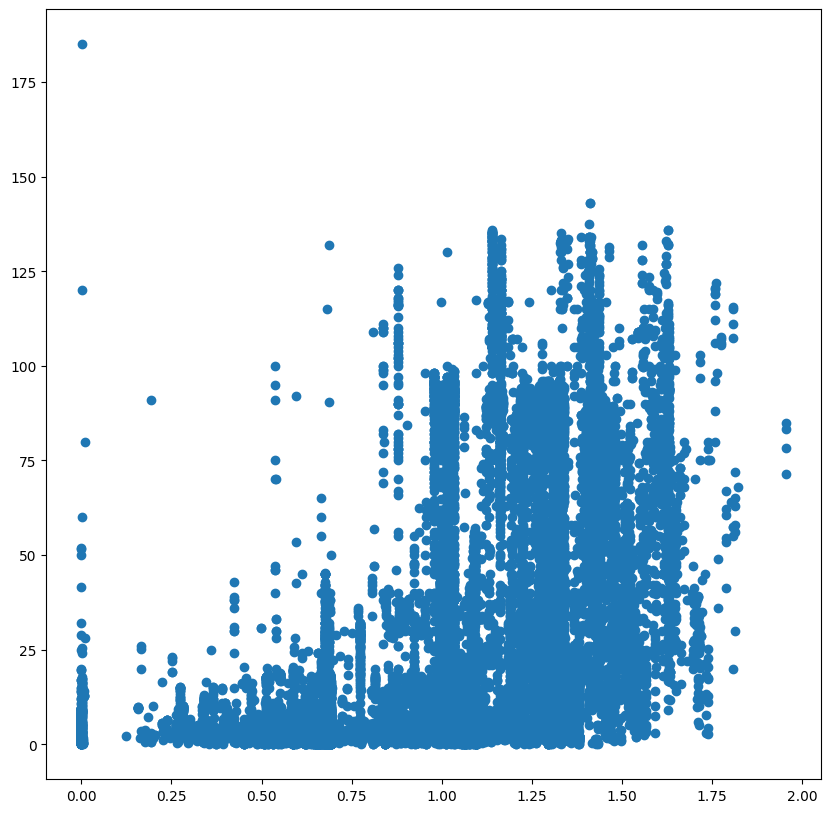

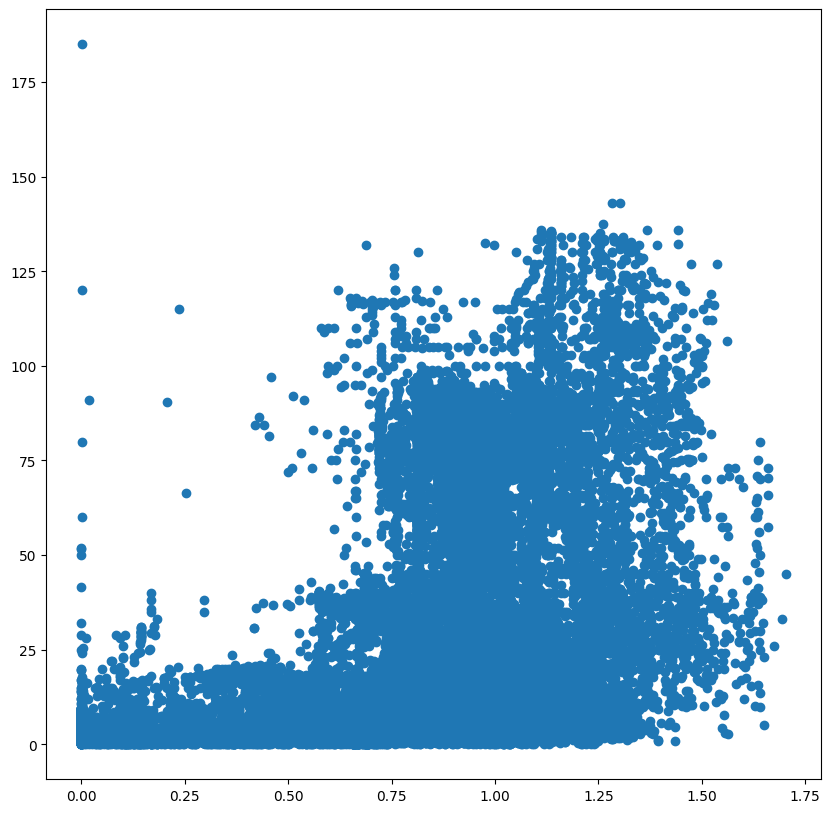

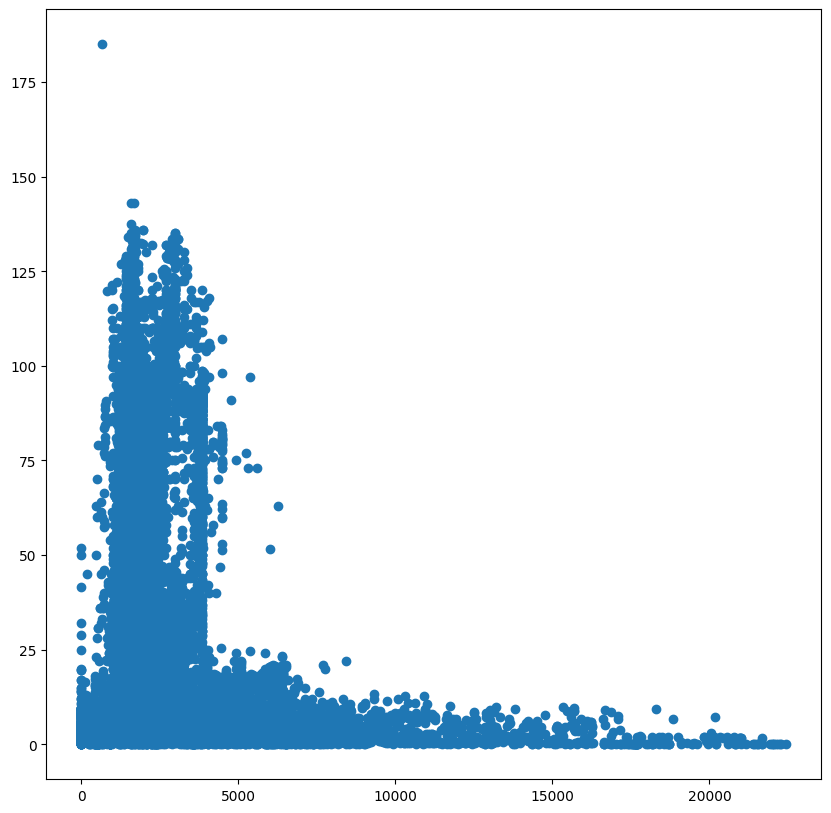

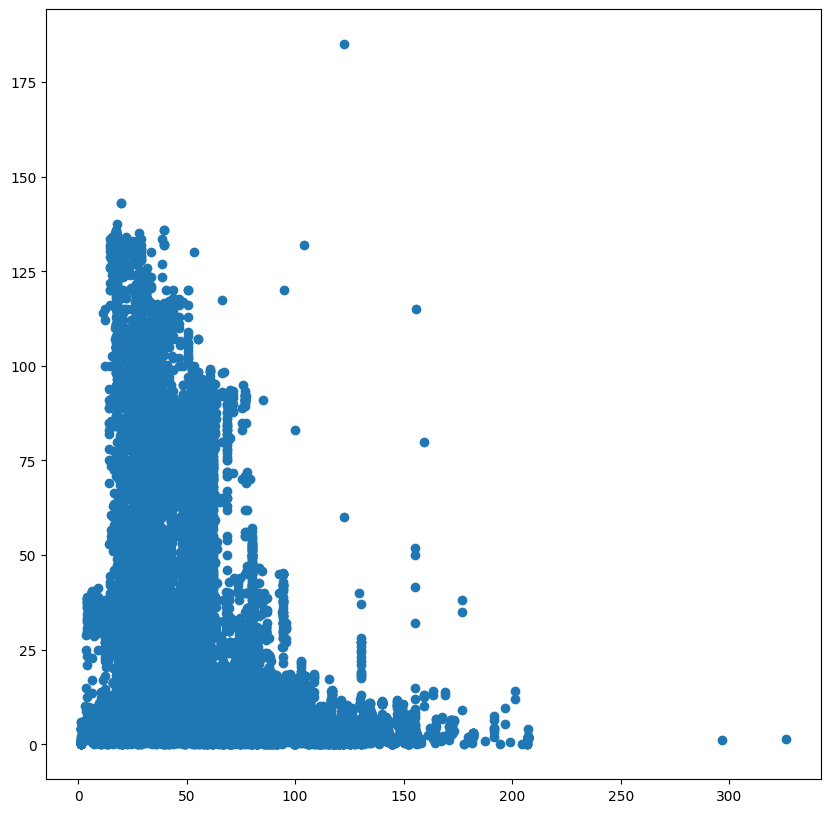

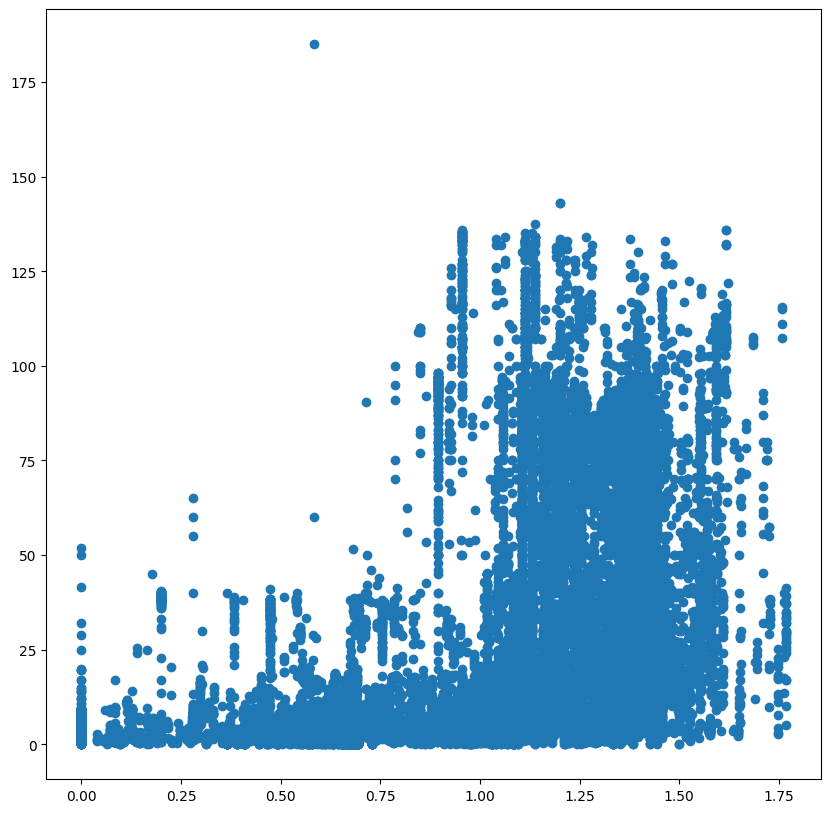

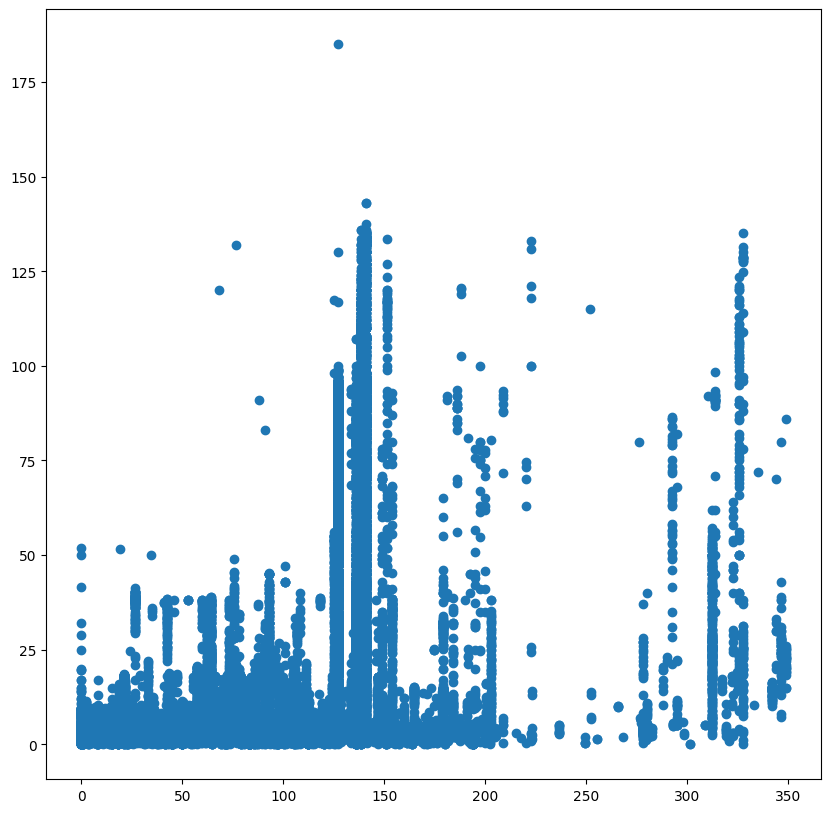

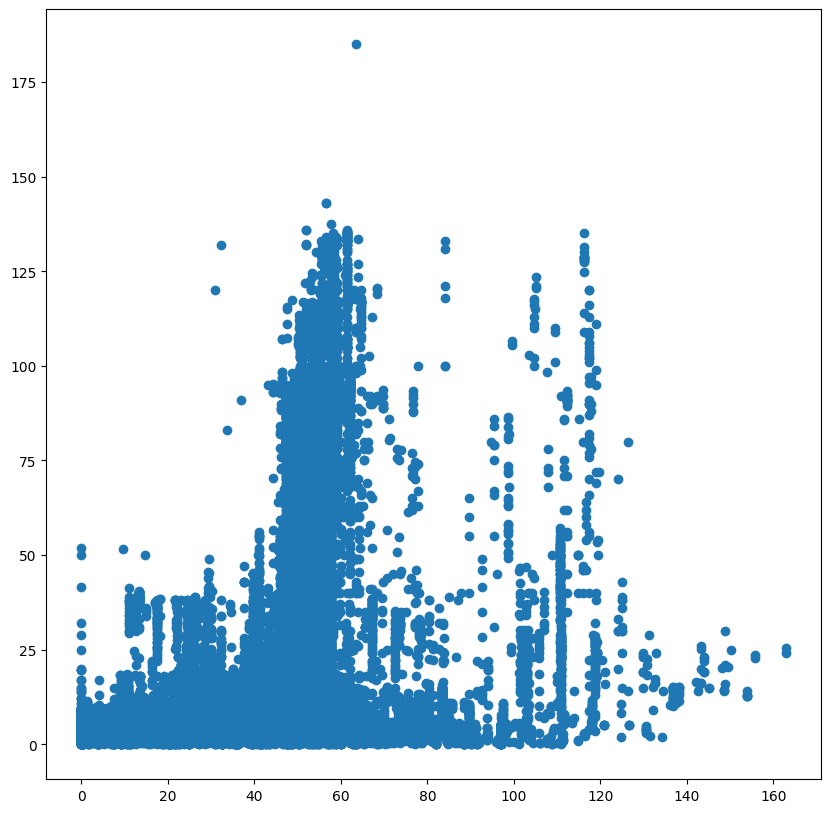

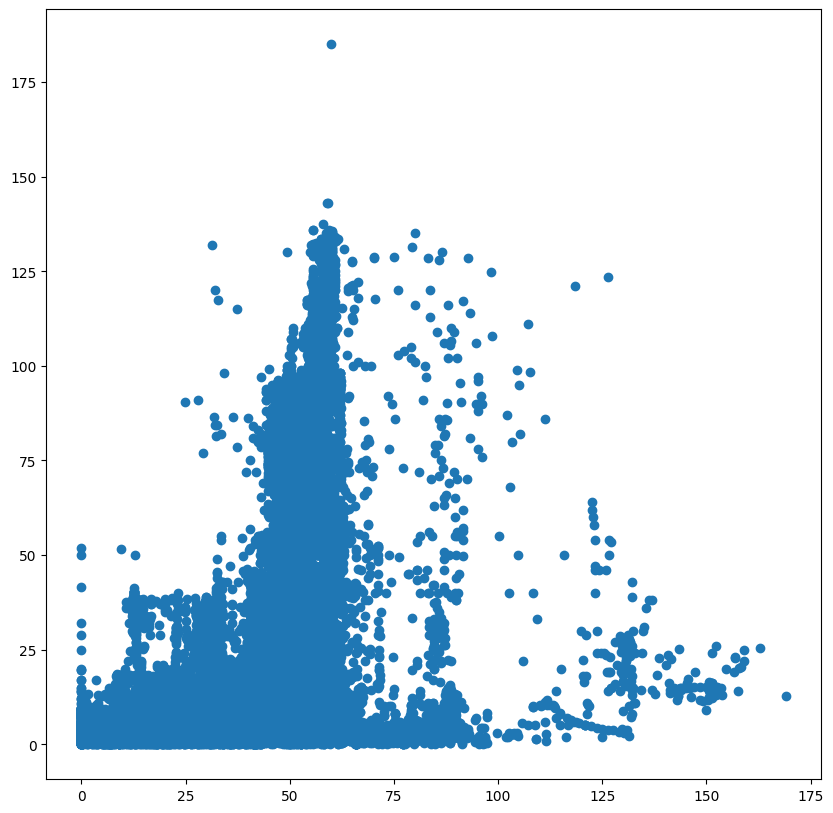

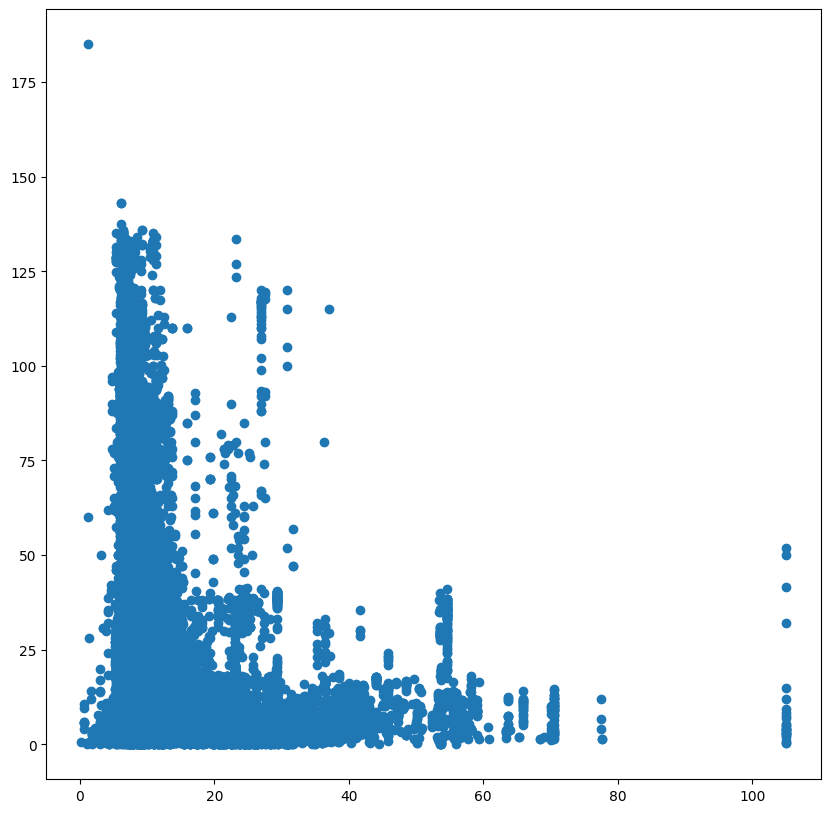

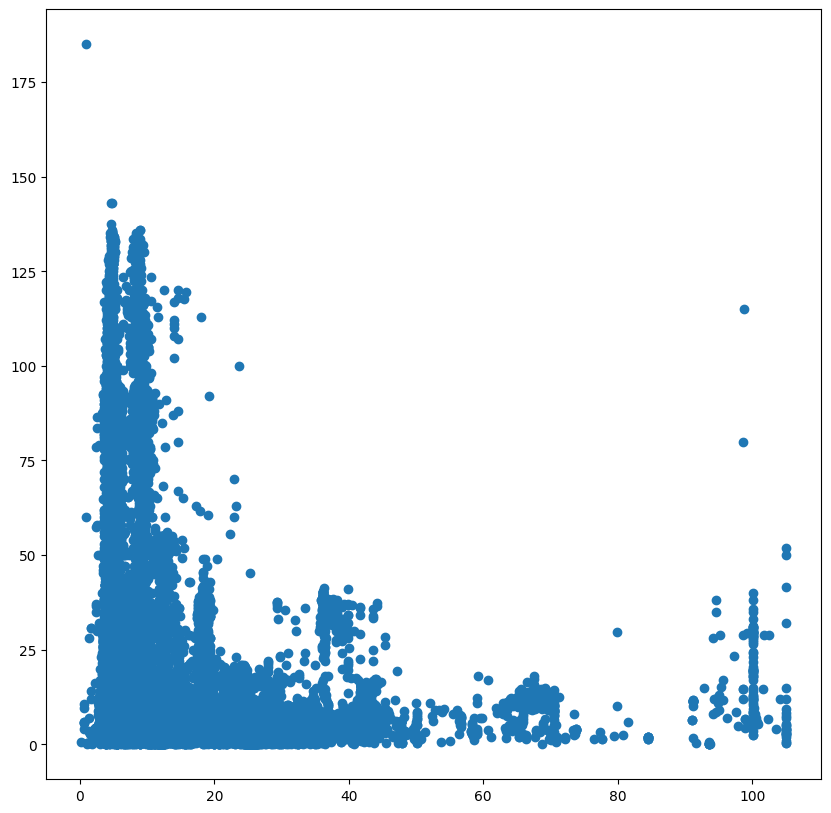

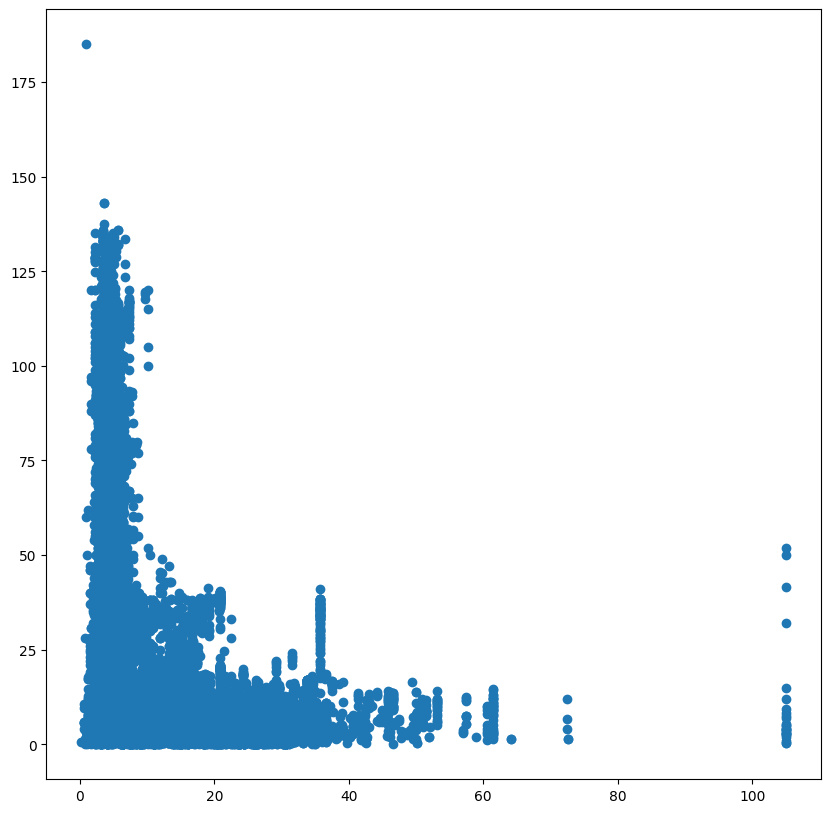

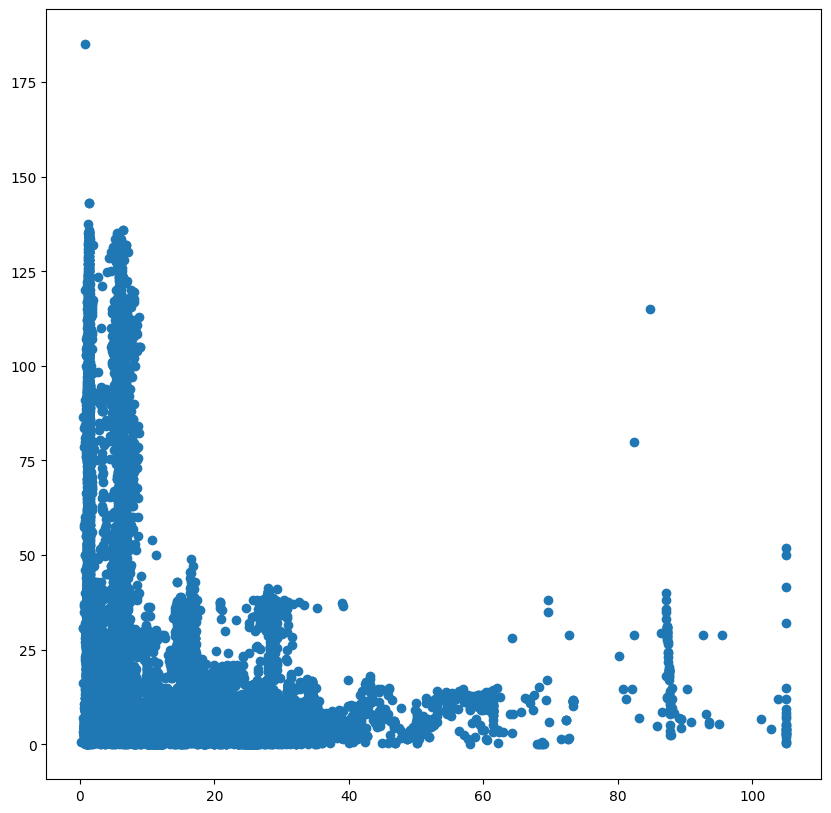

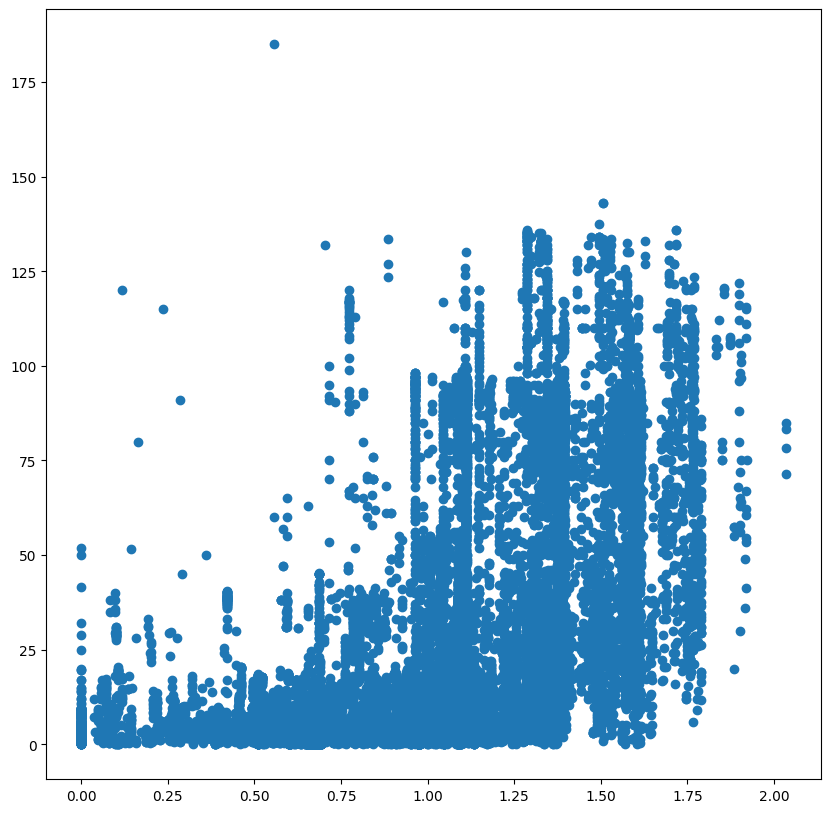

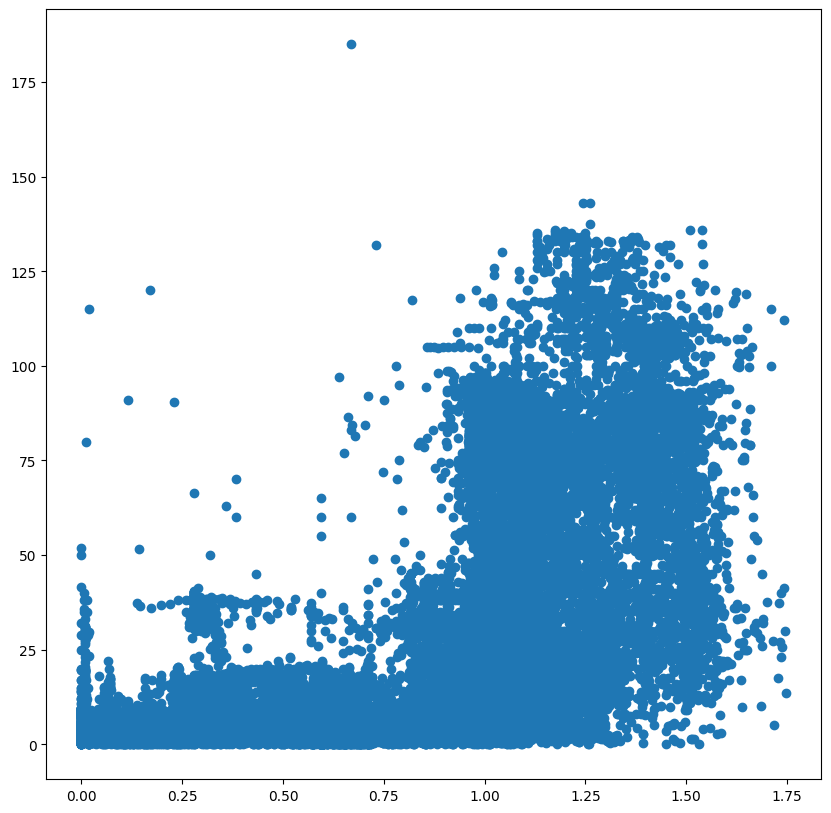

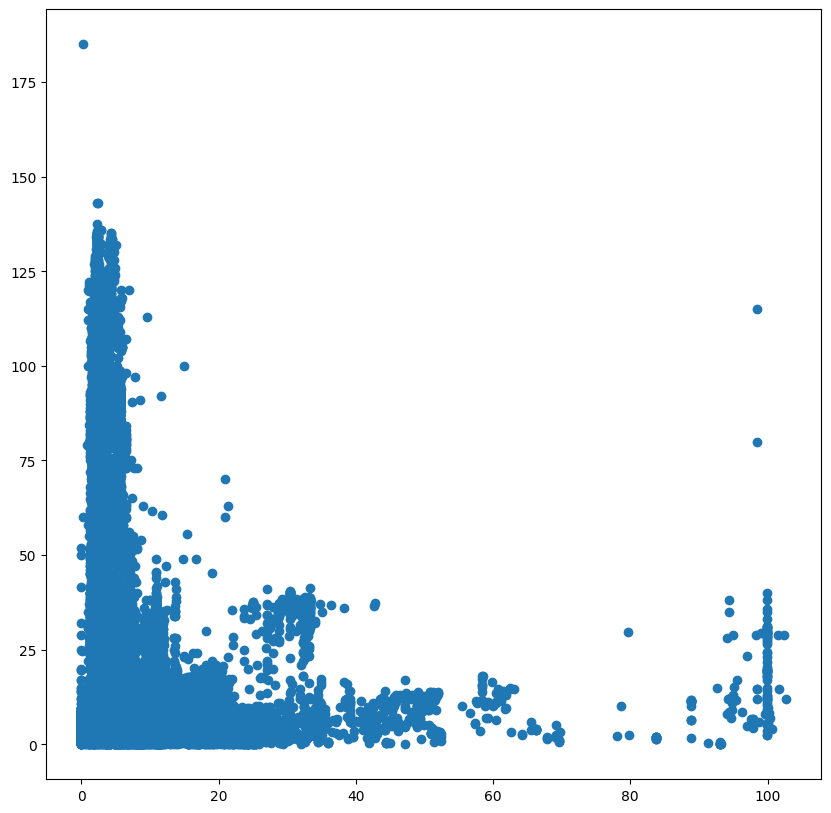

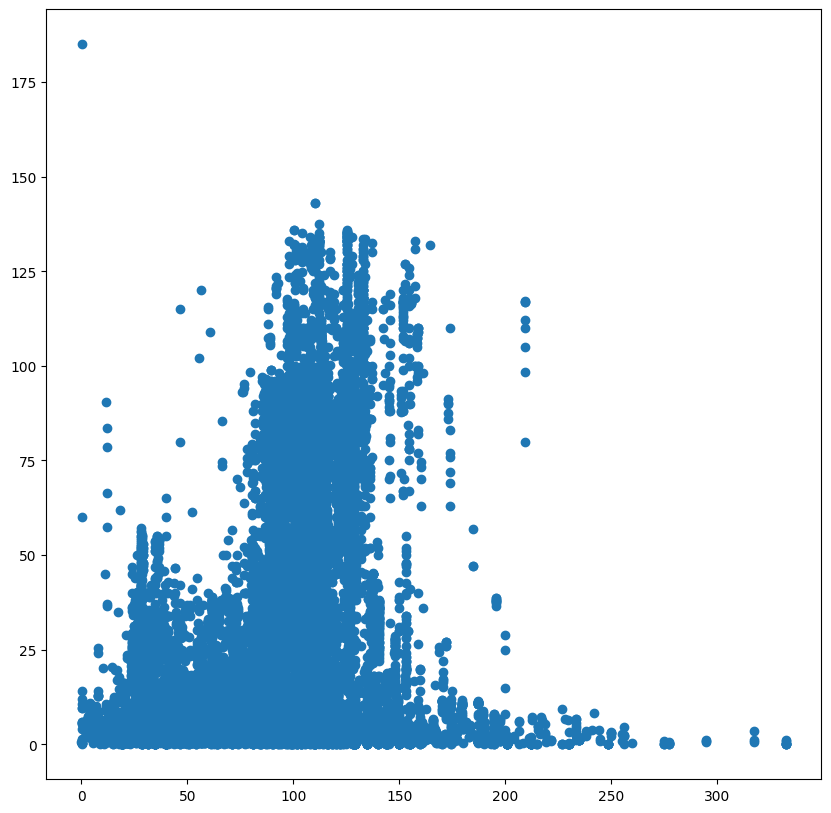

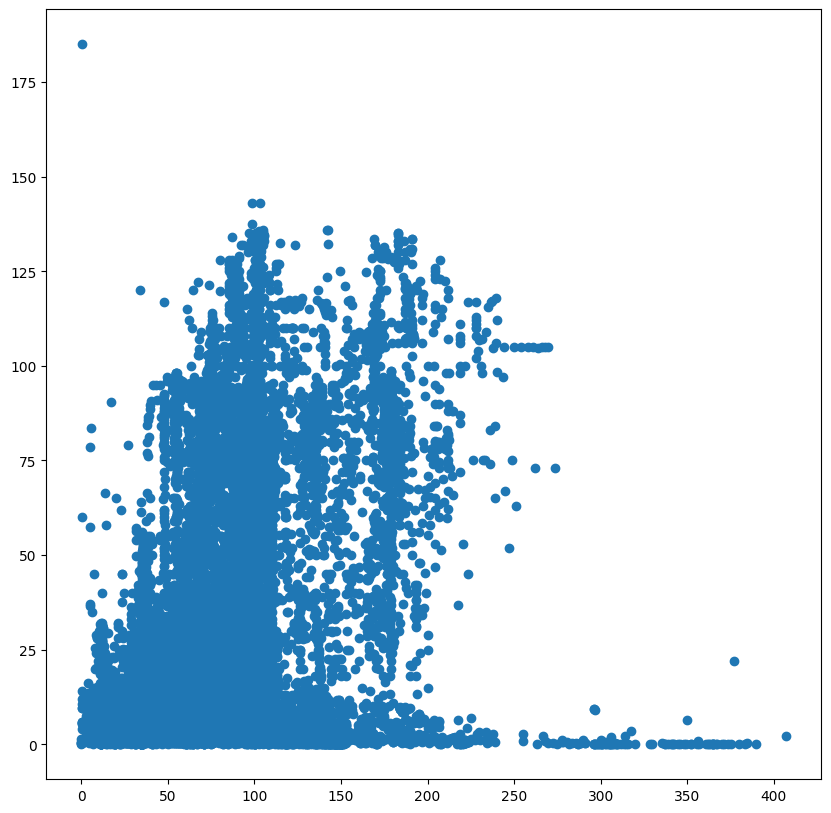

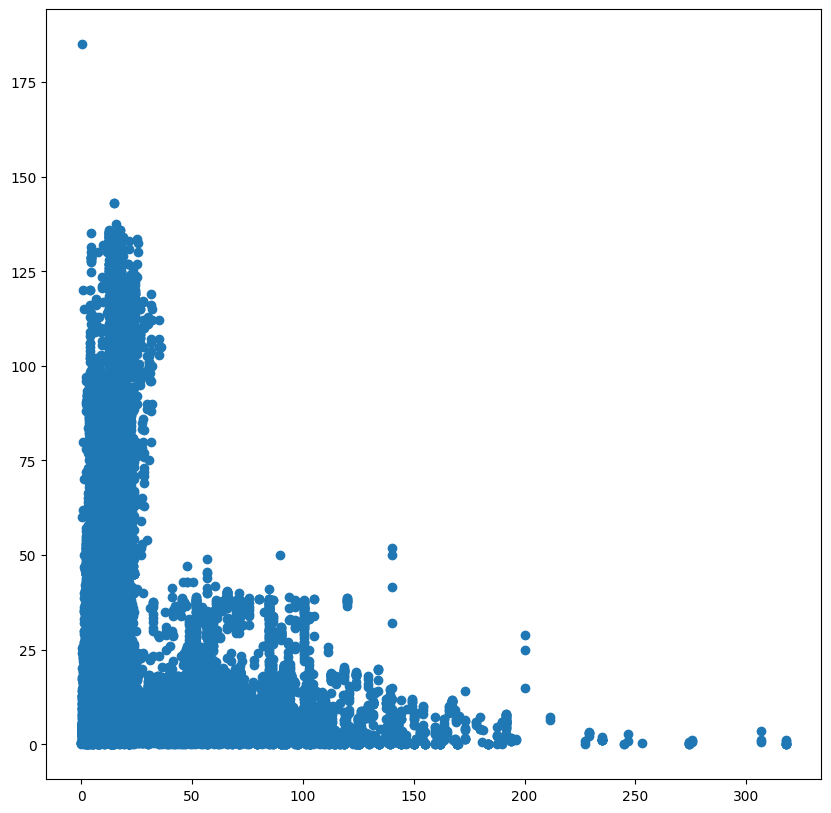

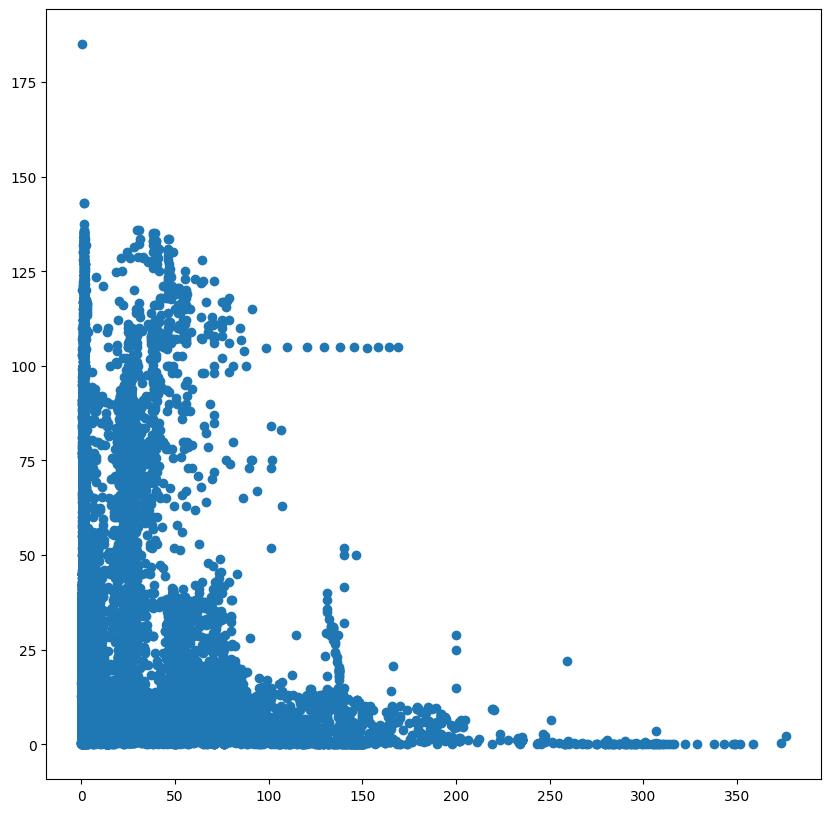

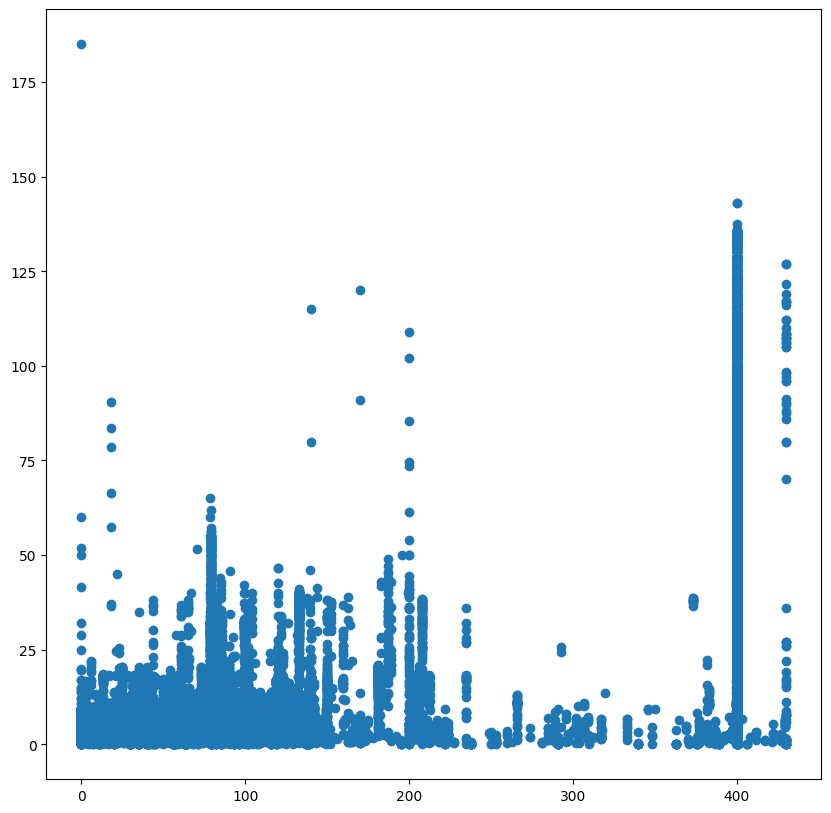

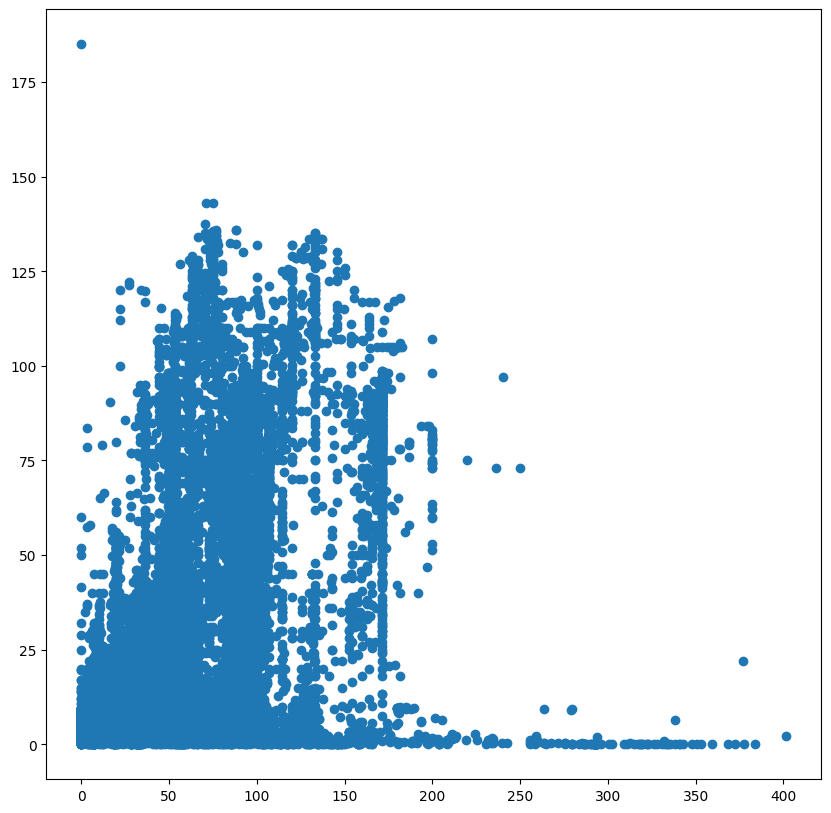

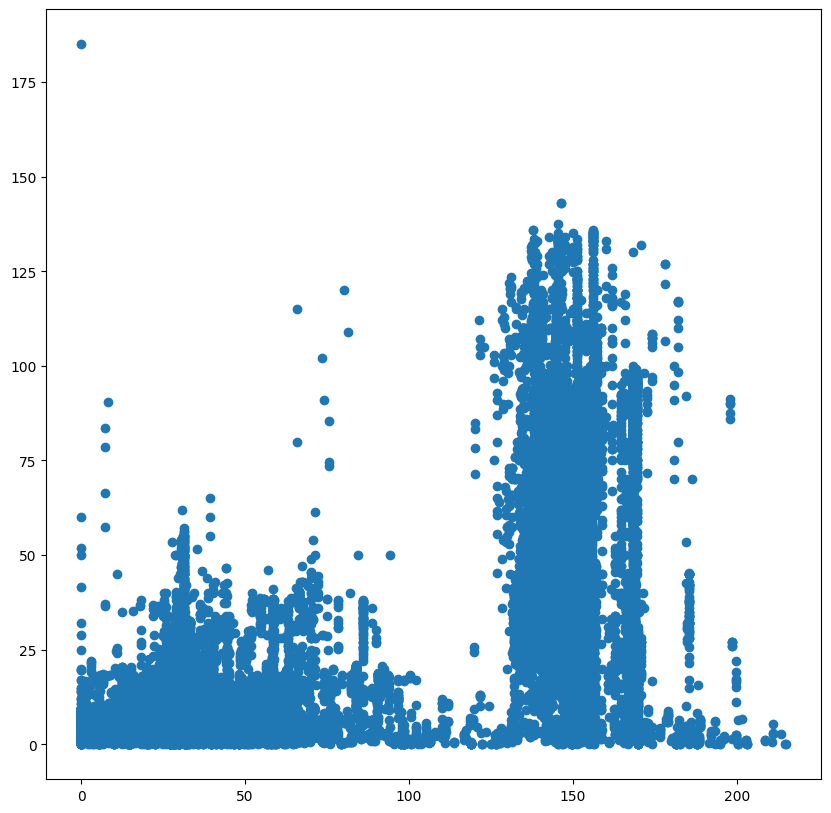

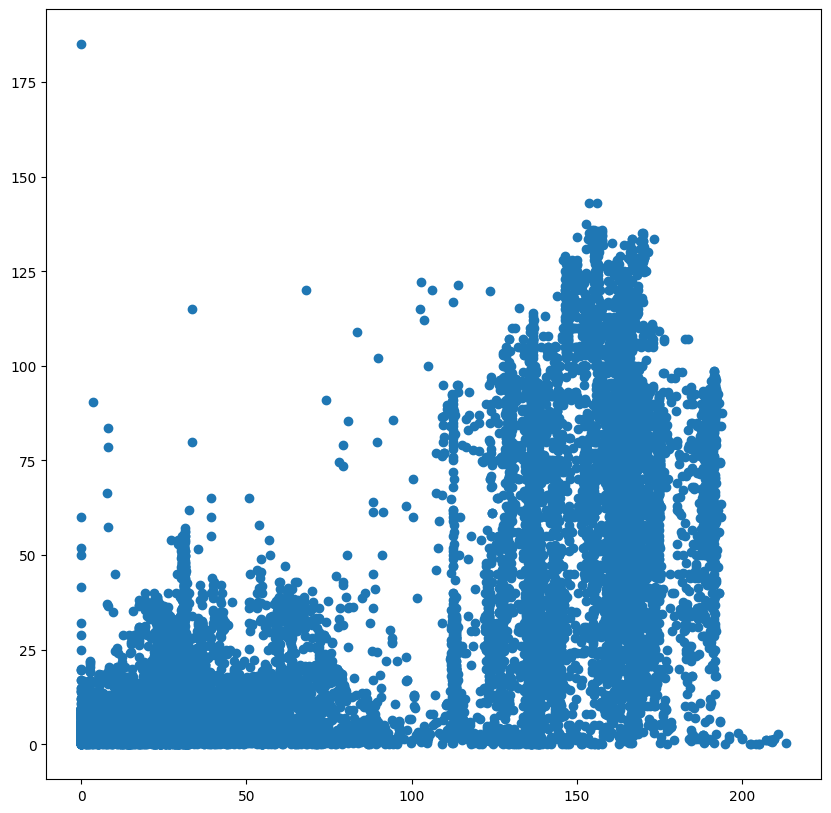

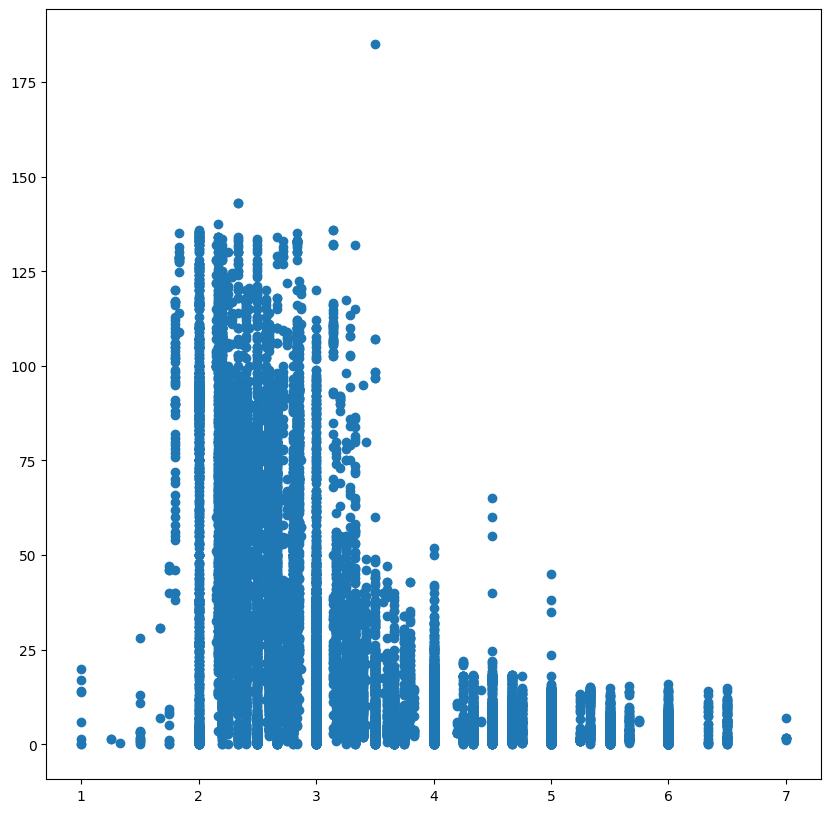

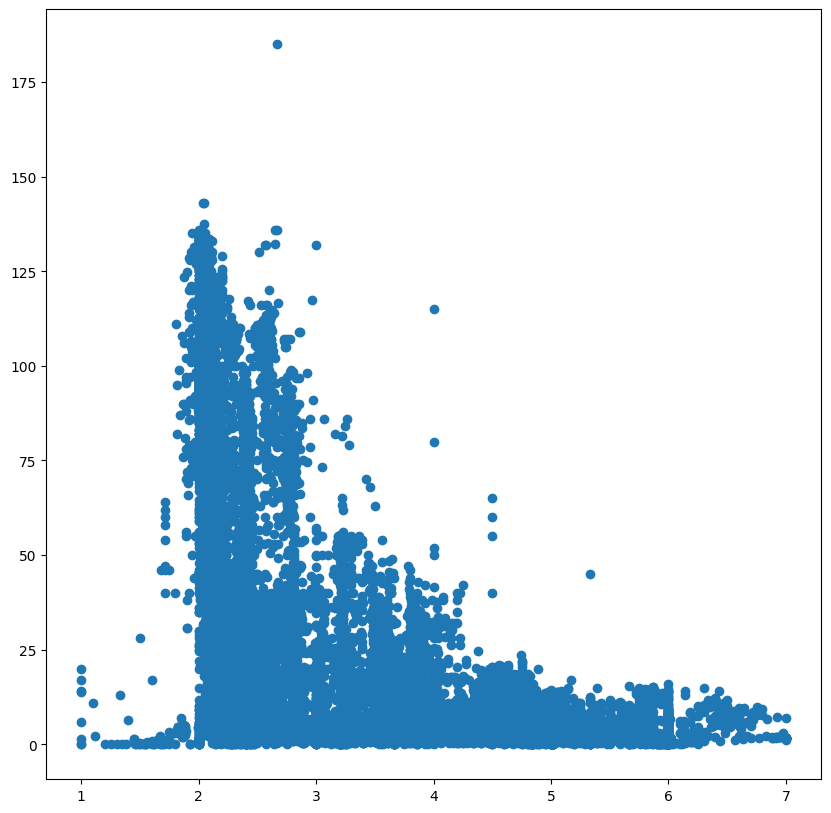

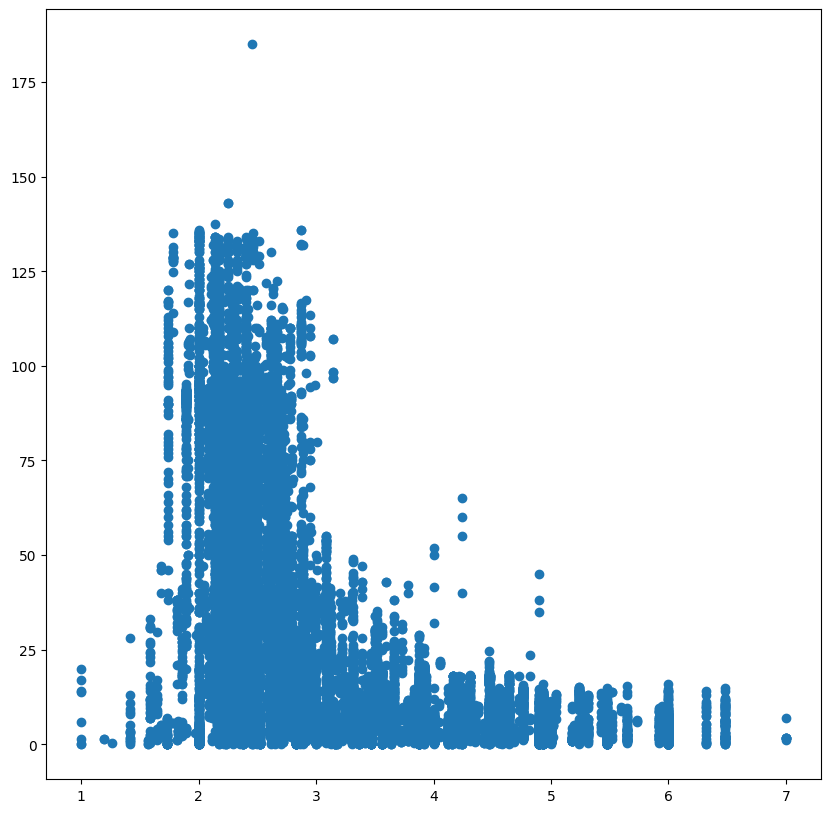

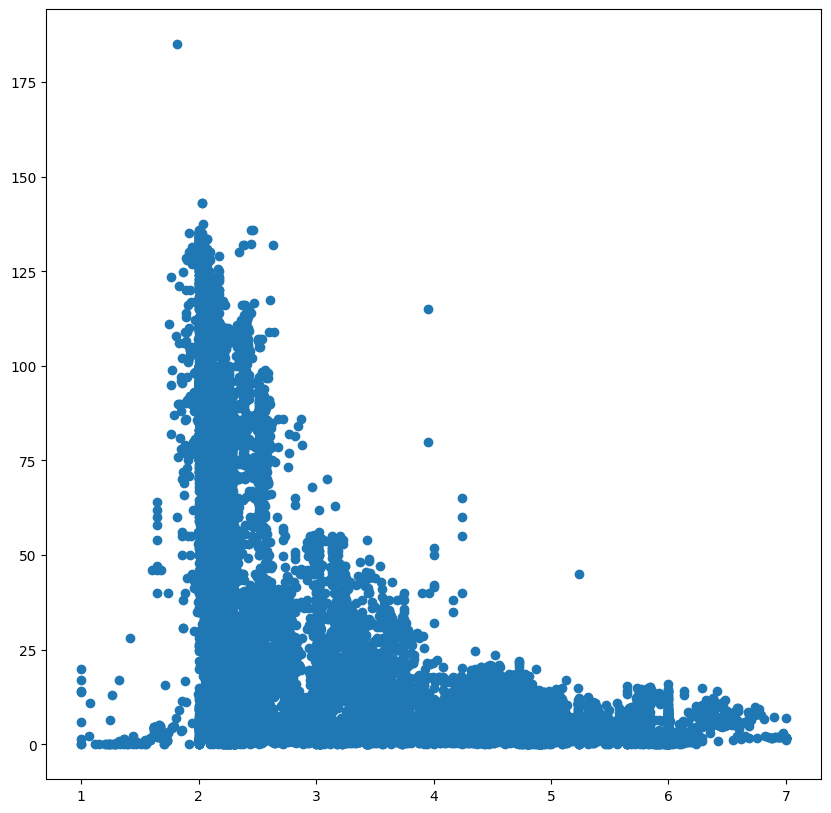

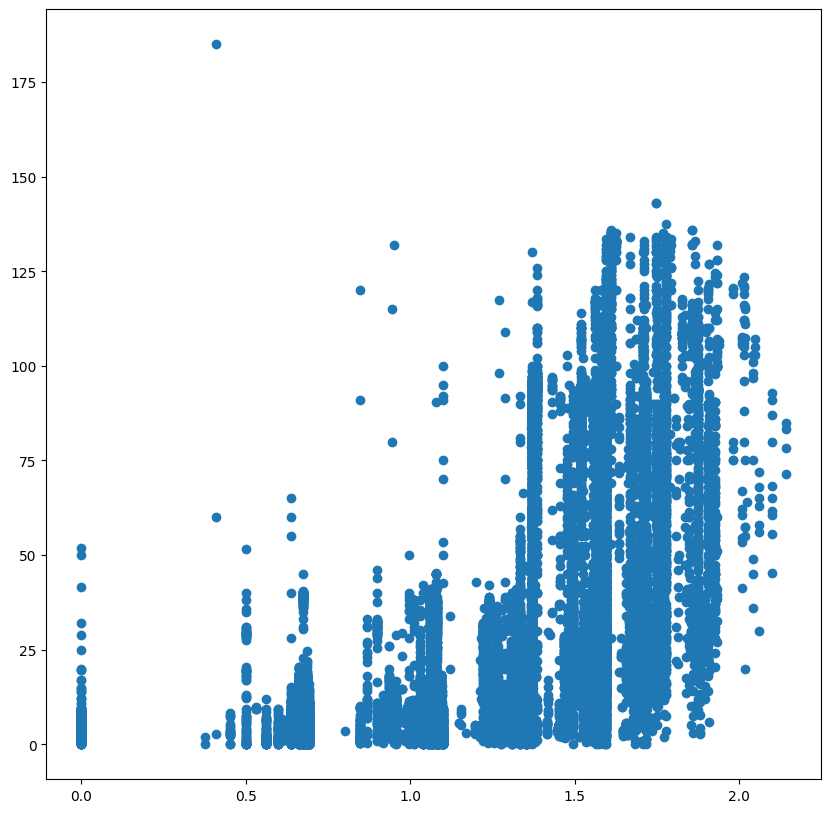

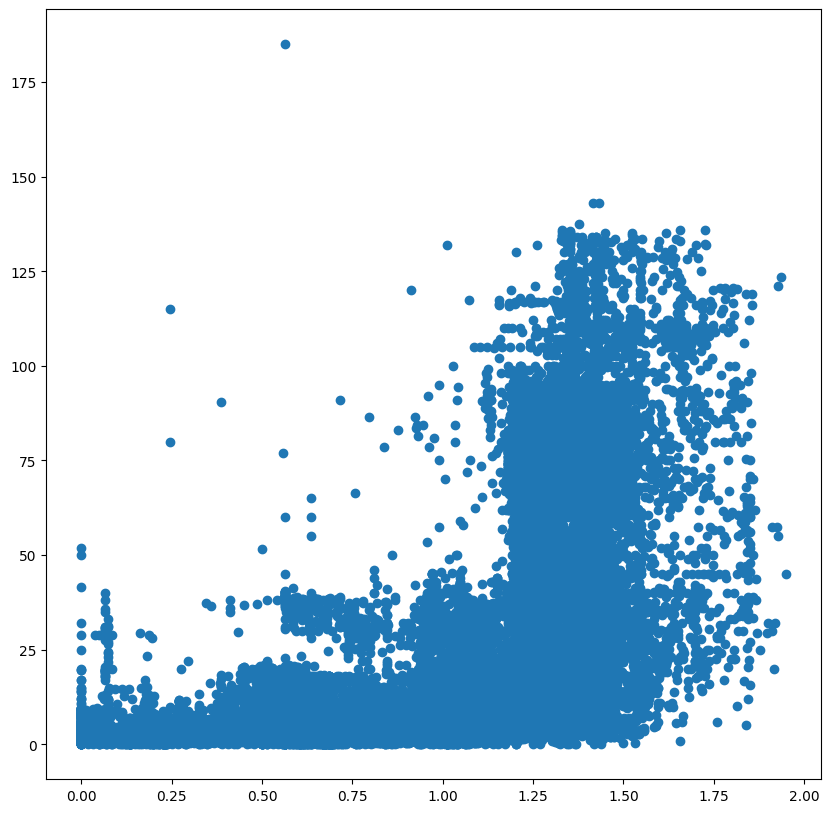

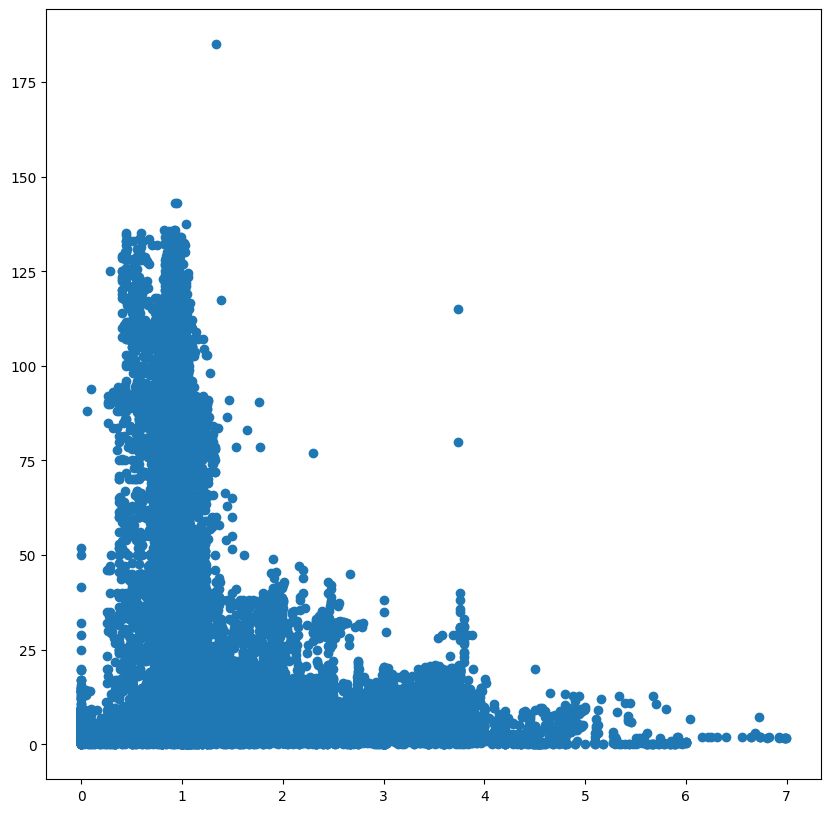

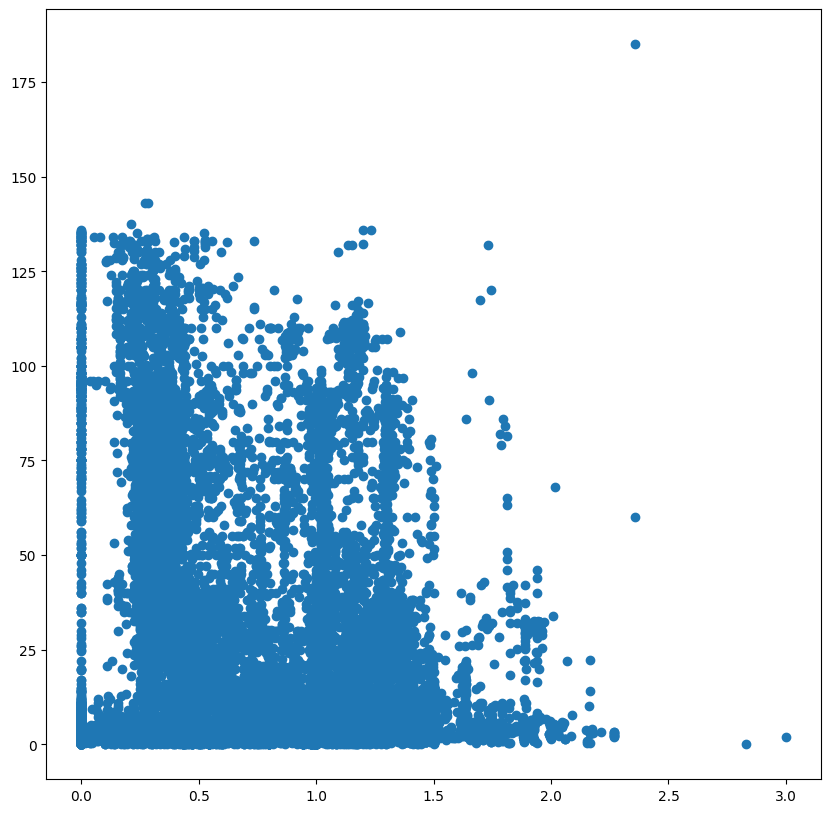

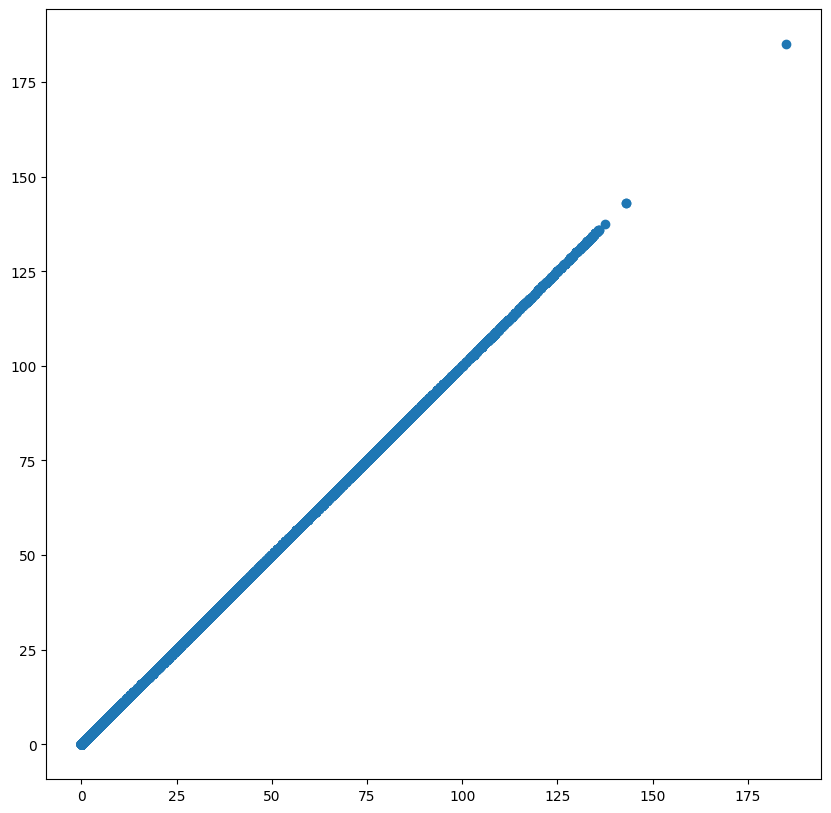

In [26]:
col_names = list(data.columns)

for i in range(len(col_names)):

    try:
        plt.figure(figsize=(10, 10))
        # plt.subplot(10, 6, i+1)
        plt.scatter(data[col_names[i]], data['critical_temp'])
        # plt.xlabel(f'Col no. {i}')
        # plt.ylabel('critical_temp')

    except ValueError:
        break;

#plt.figure(figsize=(60, 60))

In [ ]:
for i, column in range(60), data.columns:
  plt.subplot(10, 6, )

In [ ]:
# import linear regression from sklearn and split 'data' into 0.8 train and 0.2 test

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = data.drop('critical_temp', axis=1)
y = data['critical_temp']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model and fit it to the training data

model = LinearRegression()
model.fit(X_train, y_train)

# Get the model's score on the testing data

print('\nR2 score on test data', model.score(X_test, y_test))

# Get the model's intercept

print('\nIntercepts', model.intercept_)

# Get the model's coefficients

print('\nCoeffs:', model.coef_)

# Get the model's predictions on the test data

y_pred = model.predict(X_test)

# Plot a scatter plot of the model's predictions vs the actual values

plt.scatter(y_test, y_pred)

# Plot a histogram of the residuals

plt.hist(y_test - y_pred)

# Do a cross validation of the model using 10 folds and print it in terms of avg +/- std

from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train, y_train, cv=10)
print('\n', scores.mean(), '+/-', scores.std())